**<center>CM3070 FINAL YEAR PROJECT, 0CT-MAR 2023 SESSION</center>**

**<center>MISINFORMATION MITIGATION USING FAKE NEWS DETECTION EMPLOYED BY NATURAL LANGUAGE PROCESSING</center>**

**<center>NAME: NIRMAL PARTHASARATHY</center>**

**<center>STUDENT NUMBER: 190428228</center>**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>NOTEBOOK OUTLINE</center>**

**CHAPTER 1**

Dependencies, Tools and Modules Import

**CHAPTER 2**

Dataset Acquisition, Preparation and Exploratory Data Analysis

**CHAPTER 3**

Further EDA, Data Distribution Analysis, Wordclouds

**CHAPTER 4**

Collation of the SimpleNLP pipeline. Here we execute the conversion of multi-class labelling format to a binary-class labelling format, lemmatization and n-gram analysis

**CHAPTER 5**

Text classification setup using the Fake-Real dataset resulting from the SimpleNLP Pipeline.
Employs Machine Learning, Classifiers, Models and Evaluation metric techniques to produce the required results.

**CHAPTER 6**

Baseline Performance Model: SimpleNLP + TF-IDF Approach + Multinomial Naive Bayes Classifier

**CHAPTER 7**

Alternative Classification Performance Model: SimpleNLP + TF-IDF Approach + Passive Aggressive Classifier

**CHAPTER 8**

Extensive Data Cleanse NLP (EDC-NLP) Pipeline: A sophisticated and comprehensive pipeline as compared to the SimpleNLP approach

**CHAPTER 9**

BERT Approach

**CHAPTER 10**

DEEP LEARNING APPROACH - SELF-DEVELOPED MODELS, USING VARIED DEEP LEARNING METHODS

1. EDC-NLP + CNN DEEP LEARNING MODEL - CNN Network model
2. EDC-NLP + RCNN + LSTM DEEP LEARNING MODEL - RCNN + LSTM Network model

**CHAPTER 11**

Baseline Pro MODEL

EDC-NLP + TF-IDF Approach + Multinomial Naive Bayes Classifier

**CHAPTER 12**

Alternative Pro MODEL

EDC-NLP + TF-IDF Approach + Passive Aggressive Classifier

**CHAPTER 13**

COMPARISON OF RESULTS USING A GRAPH PLOT

Graph plot comparing accuracy, precision and recall scores of the 7 different Fake News Detection Text Classification approaches

Deep Learning accuracy/loss curve plots for training and validation data 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**


    
**<center>CHAPTER 1</center>**

**<center>Dependencies, Tools and Modules</center>**



**1.1: DEPENDENCY SET UP**

Before commencing on the project proper, we have to first install the relevant modules, libraries and other dependencies to ensure that we have the necessary tools to perform data cleaning, dataset modifications, linguistical processes and exploratory data analysis in order to develop a proper Natural Language Programming (NLP) pipeline.

**1.2: Data Cleaning Module**

**Installing Autocorrect & Unidecode**

I have decided to simplify the spell checking process of the data that we are analyzing in the dataset that we acquire. Hence, I am using the autocorrect NLP feature that can be found in Python to do so. I have installed the contractions library to expand the contracted words in text strings.

I have also installed the Unidecode library which aids us in representing textual data as ASCII characters for processing purposes.

In [1]:
#Installation of the autocorrect module library
!pip install autocorrect
#Installation of the Unidecode library
!pip install Unidecode
#Installaton of the contractions library
!pip install contractions
#Installation of the pyspellchecker library
!pip install pyspellchecker

**1.3: LIBRARIES AND MODULES IMPORTATION**

Let us first start off by importing all the required libraries which will be used for dataset pre-processing, natural language processing, text classification, and machine / deep learning workflows

In [2]:
#Libraries for NLP techniques
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
stoplist = set(stoplist)


from autocorrect import Speller
from spellchecker import SpellChecker

from nltk import word_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

import re
from unidecode import unidecode
import time
import string
import timeit
import html
import unicodedata
import contractions

from bs4 import BeautifulSoup

#Libraries for basic pre-processing and dataset manipulations
import numpy as np 
import pandas as pd

#Libraries for plotting data in a visual format
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NirmalLohitya1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/NirmalLohitya1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 2</center>**

<center>Dataset acquisition, preparation and exploration</center>

**2.1: DATASET ACQUISITION (KAGGLE)**

We now proceed on to downloading and accessing the Fake-Real News dataset, which is a dataset of approximately 10000+ news articles comprising of data and meta-data web scraped from multiple pages from the Politifact database

In [3]:
#Install Kaggle
!pip install -q kaggle
#Install opendatasets to download the dataset from Kaggle
!pip install opendatasets --upgrade
#Library to access the kaggle dataset as open data
import opendatasets as openD

#Kaggle dataset URL
kaggle_url = 'https://www.kaggle.com/datasets/techykajal/fakereal-news'
#Download the kaggle dataset which corresponds to the Kaggle dataset URL above
openD.download(kaggle_url)

Skipping, found downloaded files in "./fakereal-news" (use force=True to force download)


**2.2: DATASET SNEAK PEEK**

Once we have successfully downloaded the dataset, we can now take a look at the dataset to understand its characteristics and how it can be used to initiate the project plan that I have proposed in my report plans.

In [4]:
#Read the New Task.csv file as a Panda object
fyp_news_data = pd.read_csv('./fakereal-news/New Task.csv')
#Print the first 10 records in the Fake.csv
fyp_news_data.head(20)

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow �kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,�Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE
5,Says before he planned a rally on June 19 �nob...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 17, 2020","June 18, 2020",pants-fire
6,California�s registered independent voters �wi...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 6, 2020","June 18, 2020",FALSE
7,�Antifa now banging on residents� doors in Sea...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 14, 2020","June 18, 2020",FALSE
8,�President Obama and Vice President Biden neve...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 16, 2020","June 18, 2020",FALSE
9,Says these �elite� figures are on house arrest...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 16, 2020","June 18, 2020",pants-fire


**2.3: DATASET EXPLORATORY DATA ANALYSIS + CLEAN-UP**

As can be observed by the dataframe above we can observe that the data does need some linguistical, synctatic and textual analysis and formatting to be done to be able to derive a standardised input for the text classification purposes for this project

**2.3.1: Dataset Statistics**

In [5]:
#News Dataset Dataframe Information
fyp_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   News_Headline  9960 non-null   object
 1   Link_Of_News   9960 non-null   object
 2   Source         9960 non-null   object
 3   Stated_On      9960 non-null   object
 4   Date           9960 non-null   object
 5   Label          9960 non-null   object
dtypes: object(6)
memory usage: 467.0+ KB


In [6]:
#News Dataset Data Statistics
fyp_news_data.describe()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
count,9960,9960,9960,9960,9960,9960
unique,9947,9960,2709,1028,2009,9
top,On changing the rules for filibusters on presi...,https://www.politifact.com/factchecks/2015/mar...,Donald Trump,"October 9, 20","July 21, 2016",FALSE
freq,3,1,802,51,19,2273


In [7]:
#Get the number of data points present in the dataset from 1st index of resultant NumPy array
data_rows = fyp_news_data.shape[0]
#Get the number of data features representing the data points in the dataset from 2nd index of resultant NumPy array
data_cols = fyp_news_data.shape[1]

#Number of news articles
print('News Article Quantity: ', data_rows)
#Number of data features
print('Meta-Data Extent: ', data_cols)

News Article Quantity:  9960
Meta-Data Extent:  6


**2.3.2: Dataset Features**

In [8]:
#Extract and assign the dataset features into a list
feat_vals =  fyp_news_data.columns.values

#Print dataset features
for i in range(len(feat_vals)):
        print('Dataset Feature ' + str(i+1) + ': ' +  feat_vals[i])

Dataset Feature 1: News_Headline
Dataset Feature 2: Link_Of_News
Dataset Feature 3: Source
Dataset Feature 4: Stated_On
Dataset Feature 5: Date
Dataset Feature 6: Label


**2.3.3: Multi-Label Classification**

It can be observed from the below code that the data has been labelled using a multi-label classification, ranging from TRUE to PANTS ON FIRE classes among 6 levels.

I have planned to handle this by converting the labels to a binary classification after the clean-up phase is complete

In [9]:
#Extract unique data classification labels into a list
legitimacy_labels = fyp_news_data['Label'].unique()
legit_labels = legitimacy_labels[:6]

#Print the unique classification labels
for i in range(len(legit_labels)):
               print('News Classification Label ' + str(i+1) + ': ' + legit_labels[i])

News Classification Label 1: FALSE
News Classification Label 2: pants-fire
News Classification Label 3: barely-true
News Classification Label 4: TRUE
News Classification Label 5: mostly-true
News Classification Label 6: half-true


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 3</center>**

<center>Comprehension of data distribution analysis and word clouds</center>

**3.1: WORDCLOUD**

Plotting the most common words found in the dataset, categorized according to the labels pertaining to each news article

In [10]:
#Installation of the wordcloud library 
!pip install wordcloud

**3.1.1: First we split up the datasets into dataframes of the multiple labels which the news articles fall under**

We also convert each dataframe into a csv file for future analysis and word cloud generation

In [11]:
#Conversion of FALSE news data points into a .csv file for wordcloud generation function pipeline
fyp_false_df = fyp_news_data[fyp_news_data['Label']=='FALSE']
fyp_false_df.to_csv('fyp_false.csv')

#Conversion of PANTS-FIRE news data points into a .csv file for wordcloud generation function pipeline
fyp_pantsfire_df = fyp_news_data[fyp_news_data['Label']=='pants-fire']
fyp_pantsfire_df.to_csv('fyp_pantsfire.csv')

#Conversion of TRUE news data points into a .csv file for wordcloud generation function pipeline
fyp_true_df = fyp_news_data[fyp_news_data['Label']=='TRUE']
fyp_true_df.to_csv('fyp_true.csv')

#Conversion of BARELY-TRUE news data points into a .csv file for wordcloud generation function pipeline
fyp_barelytrue_df = fyp_news_data[fyp_news_data['Label']=='barely-true']
fyp_barelytrue_df.to_csv('fyp_barelytrue.csv')

#Conversion of MOSTLY-TRUE news data points into a .csv file for wordcloud generation function pipeline
fyp_mostlytrue_df = fyp_news_data[fyp_news_data['Label']=='mostly-true']
fyp_mostlytrue_df.to_csv('fyp_mostlytrue.csv')

#Conversion of HALF-TRUE news data points into a .csv file for wordcloud generation function pipeline
fyp_halftrue_df = fyp_news_data[fyp_news_data['Label']=='half-true']
fyp_halftrue_df.to_csv('fyp_halftrue.csv')

**3.1.2: Here, we define a function to generate and plot a wordcloud**

In [12]:
def gen_wordcloud(datalabel_type):
    
    '''
    This function generates a Wordcloud representative of the significance of the 
    textual information represented by the data points found in the news dataset
    corresponding to the legimitacy of the news article
    
    Arguments: 
    - datalabel_type (str): Legitimacy label of the news article according to the data points in the dataset
    
    Returns:
    - Plots a Wordcloud with a black background and multi-coloured word results
    
    '''
    
    from wordcloud import WordCloud, STOPWORDS
    
    #Logical code to switch between the fake news or real news datasets
    if(datalabel_type == 'FALSE'):
        dataset = pd.read_csv('./fyp_false.csv', encoding = "latin-1", usecols = ['News_Headline'])
    elif(datalabel_type == 'pants-fire'):
        dataset = pd.read_csv('./fyp_pantsfire.csv', encoding = "latin-1", usecols = ['News_Headline'])
    elif(datalabel_type == 'TRUE'):
        dataset = pd.read_csv('./fyp_true.csv', encoding = "latin-1", usecols = ['News_Headline'])
    elif(datalabel_type == 'barely-true'):
        dataset = pd.read_csv('./fyp_barelytrue.csv', encoding = "latin-1", usecols = ['News_Headline'])
    elif(datalabel_type == 'mostly-true'):
        dataset = pd.read_csv('./fyp_mostlytrue.csv', encoding = "latin-1", usecols = ['News_Headline'])
    elif(datalabel_type == 'half-true'):
        dataset = pd.read_csv('./fyp_halftrue.csv', encoding = "latin-1", usecols = ['News_Headline'])    
    else:
        print("Please enter the appropriate label")

    #Empty string to join to, for generating final corpus to generate word cloud
    final_news_corpus = ''
    stopwords = set(STOPWORDS)
    
    for words in dataset.items():
    
        words = str(words)
        subwords = words.split()
        
        for w in range(len(subwords)):
            subwords[w] = subwords[w].lower()

        final_news_corpus += " ".join(subwords) + " "
        
    #Generate a word cloud using the WordCloud module
    final_w_cloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stopwords, min_font_size = 10).generate(final_news_corpus)
    
    #Plot the generated wordcloud
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(final_w_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

**3.1.3: Wordcloud Plotting and Results**

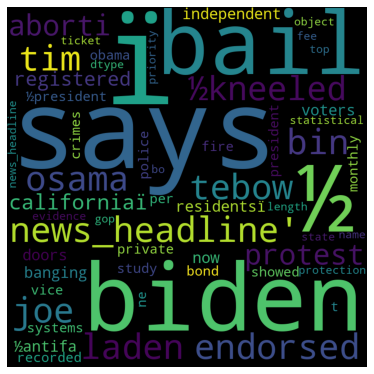

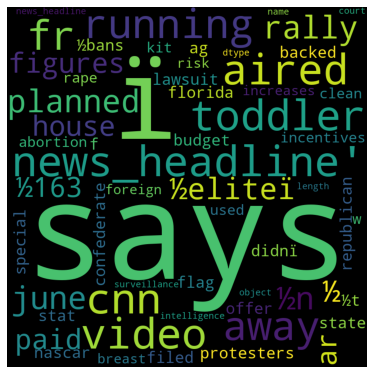

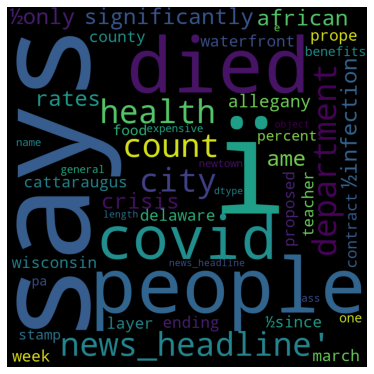

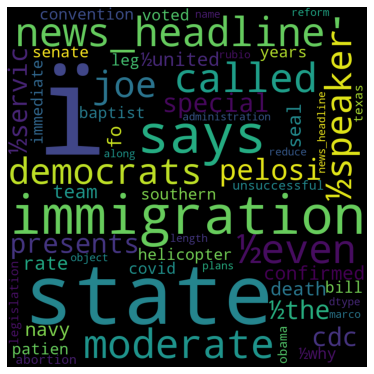

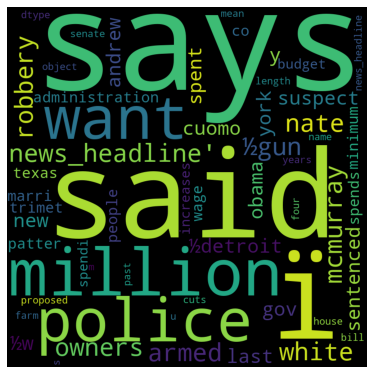

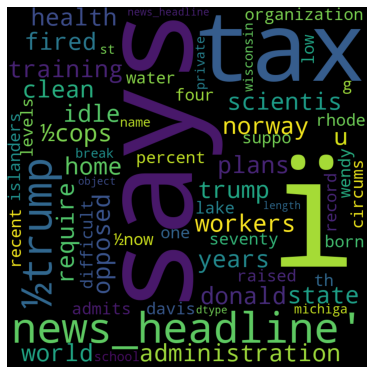

In [13]:
#False News
gen_wordcloud('FALSE')
gen_wordcloud('pants-fire')


#Real News
gen_wordcloud('TRUE')
gen_wordcloud('barely-true')
gen_wordcloud('mostly-true')
gen_wordcloud('half-true')

**3.2: MULTI-CLASSIFIED LABELLING - Plotting the label distribution of the legitimacy of the news articles found in the dataset**

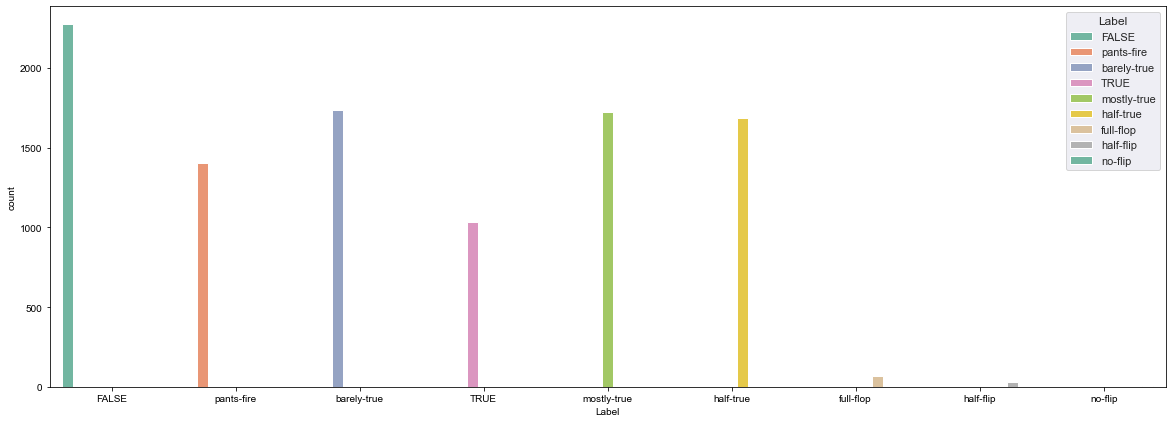

In [14]:
#Seaborn plot to depict the legitimacy distribution of the news articles in the dataset
fig, ax = plt.subplots(figsize=(20,7))
sns.set_theme()
sns.countplot(x='Label', hue='Label', data=fyp_news_data, palette="Set2")
plt.show()

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 4 (SimpleNLP)</center>**

<center>Collation of the SimpleNLP pipeline. Here we execute the conversion of multi-class labelling format to a binary-class labelling format, lemmatization and n-gram analysis</center>

**4.1: Conversion of multi-class labelled dataset to a binary classification (REAL or FAKE)**

In [15]:
#Print the first 10 records of the multi-class labelled dataset before binary conversion
fyp_news_data.head(10)

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow �kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,�Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE
5,Says before he planned a rally on June 19 �nob...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 17, 2020","June 18, 2020",pants-fire
6,California�s registered independent voters �wi...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 6, 2020","June 18, 2020",FALSE
7,�Antifa now banging on residents� doors in Sea...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 14, 2020","June 18, 2020",FALSE
8,�President Obama and Vice President Biden neve...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 16, 2020","June 18, 2020",FALSE
9,Says these �elite� figures are on house arrest...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 16, 2020","June 18, 2020",pants-fire


In [16]:
#Convert FALSE/pants on fire dataframe to FALSE by adding a new column with 0 to represent fake news
fyp_false_df['FakeorReal'] = 0
fyp_pantsfire_df['FakeorReal'] = 0

#Convert range of truth labels dataframe to TRUE by adding a new column with 1 to represent real news
fyp_true_df['FakeorReal'] = 1
fyp_barelytrue_df['FakeorReal'] = 1
fyp_mostlytrue_df['FakeorReal'] = 1
fyp_halftrue_df['FakeorReal'] = 1

concat_fyp_newsdata = pd.concat([fyp_false_df,fyp_pantsfire_df,fyp_true_df,fyp_barelytrue_df,fyp_mostlytrue_df,fyp_halftrue_df], ignore_index = True)
final_fyp_newsdata = concat_fyp_newsdata.drop(['Source', 'Link_Of_News' ,'Stated_On', 'Date', 'Label'], axis = 1)

web_scr_fyp_newsdata = concat_fyp_newsdata.drop(['Source', 'Stated_On', 'Date', 'Label'], axis = 1)
final_web_df = pd.concat([web_scr_fyp_newsdata[:630], web_scr_fyp_newsdata[8000:8533]])


<ipython-input-16-a0dcace17f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fyp_false_df['FakeorReal'] = 0
<ipython-input-16-a0dcace17f39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fyp_pantsfire_df['FakeorReal'] = 0
<ipython-input-16-a0dcace17f39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [17]:
final_fyp_newsdata

,News_Headline,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
...,...,...
9850,"""Not one tax has been raised since I've been g...",1
9851,"""Seventy-four percent of Rhode Islanders suppo...",1
9852,"Says Wendy Davis, ""born into difficult circums...",1
9853,Recent record-low water levels in Lake Michiga...,1


In [18]:
final_web_df

,News_Headline,Link_Of_News,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,0
1,Says Tim Tebow �kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,0
2,California�s registered independent voters �wi...,https://www.politifact.com/factchecks/2020/jun...,0
3,�Antifa now banging on residents� doors in Sea...,https://www.politifact.com/factchecks/2020/jun...,0
4,�President Obama and Vice President Biden neve...,https://www.politifact.com/factchecks/2020/jun...,0
...,...,...,...
8528,"""Nearly 7 million Floridians have pre-existing...",https://www.politifact.com/factchecks/2018/sep...,1
8529,"Says Mike DeWine took $40,000 from ECOT and ""d...",https://www.politifact.com/factchecks/2018/sep...,1
8530,"""When two judges said it was illegal to fire a...",https://www.politifact.com/factchecks/2018/sep...,1
8531,"Says Andrew Gillum ""wants to abolish ICE and d...",https://www.politifact.com/factchecks/2018/sep...,1


**4.1.1: Web Scraping URL News Content from the Link_Of_News Column and making Headlines+Content into a single column**

In [19]:
import requests

#Function to scrap Link Of News Content
def dataset_URLScrape(link_of_news):
    
    '''
    This function uses the URLs found in the 'Link_Of_News' column in the original dataframe
    and extracts the news content linking to the news headline as text (String) information
    
    Arguments:
    - link_of_news (url): URL found in the dataset
    
    Returns:
    - news_ctn (str): Web scraped news content
    '''
    
    #Get the url of the news using the requests module
    response = requests.get(link_of_news)
    
    #Parse through the html body of the url
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #Extract the String information found in the html body of the web page under the url
    news_ctn = soup.get_text()
    
    return news_ctn


In [20]:
import datetime
import time

#Get start datetime
start_time = datetime.datetime.now()


# Apply scraping function to the dataframe and add results to a new column 
final_web_df['News_Content'] = final_web_df['Link_Of_News'].apply(dataset_URLScrape)


#Get end datetime
end_time = datetime.datetime.now()

#Execution Time
elapsed_time = end_time - start_time
print('Execution time:', elapsed_time, 'seconds')


Execution time: 0:39:28.860763 seconds


In [21]:
#Concatenate the news headlines and news content information into a single column
final_web_df['Final_News_Content'] = final_web_df['News_Headline'] + final_web_df['News_Content']

In [22]:
#Intermediate Dataframe 
final_web_df

,News_Headline,Link_Of_News,FakeorReal,News_Content,Final_News_Content
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,0,"\n\n\n\n\n\n\nPolitiFact | No, Osama bin Laden...",Says Osama bin Laden endorsed Joe Biden\n\n\n\...
1,Says Tim Tebow �kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,0,"\n\n\n\n\n\n\nPolitiFact | No, Tim Tebow didn’...",Says Tim Tebow �kneeled in protest of abortion...
2,California�s registered independent voters �wi...,https://www.politifact.com/factchecks/2020/jun...,0,\n\n\n\n\n\n\nPolitiFact | Facebook Post False...,California�s registered independent voters �wi...
3,�Antifa now banging on residents� doors in Sea...,https://www.politifact.com/factchecks/2020/jun...,0,\n\n\n\n\n\n\nPolitiFact | No evidence antifa ...,�Antifa now banging on residents� doors in Sea...
4,�President Obama and Vice President Biden neve...,https://www.politifact.com/factchecks/2020/jun...,0,\n\n\n\n\n\n\nPolitiFact | Donald Trump falsel...,�President Obama and Vice President Biden neve...
...,...,...,...,...,...
8528,"""Nearly 7 million Floridians have pre-existing...",https://www.politifact.com/factchecks/2018/sep...,1,\n\n\n\n\n\n\nPolitiFact | Fact-checking Rick ...,"""Nearly 7 million Floridians have pre-existing..."
8529,"Says Mike DeWine took $40,000 from ECOT and ""d...",https://www.politifact.com/factchecks/2018/sep...,1,\n\n\n\n\n\n\nPolitiFact | Fact-checking attac...,"Says Mike DeWine took $40,000 from ECOT and ""d..."
8530,"""When two judges said it was illegal to fire a...",https://www.politifact.com/factchecks/2018/sep...,1,\n\n\n\n\n\n\nPolitiFact | Group defending gov...,"""When two judges said it was illegal to fire a..."
8531,"Says Andrew Gillum ""wants to abolish ICE and d...",https://www.politifact.com/factchecks/2018/sep...,1,\n\n\n\n\n\n\nPolitiFact | Ron DeSantis leaves...,"Says Andrew Gillum ""wants to abolish ICE and d..."


In [23]:
#Insert the final news content column into the first column index
pop_col = final_web_df.pop('Final_News_Content')
final_web_df.insert(0, 'Final_News_Content', pop_col)

#Drop the unnecessary, news headline, news content and news link columns
final_df_1 = final_web_df.copy(deep=True)
final_df_2 = final_df_1.drop(final_df_1.columns[[1,2,4]], axis = 1)

In [24]:
#Resultant Dataframe with URL scraped news information
#This dataframe only contains the News Headline+Content and Binary Classification for Fake/Real News
final_df_2

,Final_News_Content,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden\n\n\n\...,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
...,...,...
8528,"""Nearly 7 million Floridians have pre-existing...",1
8529,"Says Mike DeWine took $40,000 from ECOT and ""d...",1
8530,"""When two judges said it was illegal to fire a...",1
8531,"Says Andrew Gillum ""wants to abolish ICE and d...",1


In [25]:
#Copy the latest news content dataset back into final_web_df
final_web_df = final_df_2.copy(deep=True)

In [26]:
final_web_df

,Final_News_Content,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden\n\n\n\...,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
...,...,...
8528,"""Nearly 7 million Floridians have pre-existing...",1
8529,"Says Mike DeWine took $40,000 from ECOT and ""d...",1
8530,"""When two judges said it was illegal to fire a...",1
8531,"Says Andrew Gillum ""wants to abolish ICE and d...",1


**4.1.2: News Headlines and corresponding Fake Results (0) in the Binary Classified final dataset**

In [27]:
#Print the first 25 records of the newly converted binary class labelled dataset post binary conversion
final_fyp_newsdata.head(25)

,News_Headline,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
5,"While in prison, boxer Jack Johnson invented a...",0
6,"Nazi Germany�s Hermann G�ring worked to ""defun...",0
7,�The point of defunding the Police in Minneapo...,0
8,"�According to its website Black Lives Matter, ...",0
9,Says photo of beaten woman is Aracely Henrique...,0


In [28]:
#Print the first 25 records of the newly converted binary class labelled dataset post binary conversion (web_df)
final_web_df.head(25)

,Final_News_Content,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden\n\n\n\...,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
5,"While in prison, boxer Jack Johnson invented a...",0
6,"Nazi Germany�s Hermann G�ring worked to ""defun...",0
7,�The point of defunding the Police in Minneapo...,0
8,"�According to its website Black Lives Matter, ...",0
9,Says photo of beaten woman is Aracely Henrique...,0


**4.1.3: News Headlines and corresponding Real Results (1) in the Binary Classified final dataset**

In [29]:
#Print the last 25 records of the newly converted binary class labelled dataset post binary conversion
final_fyp_newsdata.tail(25)

,News_Headline,FakeorReal
9830,Government subsidies for renewable energies su...,1
9831,"""Over 12,000 school kids were arrested in Flor...",1
9832,A provision of the Senate immigration bill wou...,1
9833,"President Barack Obama has ""announced that he ...",1
9834,The federal Consumer Financial Protection Bure...,1
9835,Says residents of Texas and San Antonio can be...,1
9836,"""Our businesses have created nearly twice as m...",1
9837,"""Gangs have increased by 40 percent since this...",1
9838,"Says last year ""13 million (health insurance) ...",1
9839,"""The U.S. Postal Service doesn�t run on your t...",1


In [30]:
#Print the last 25 records of the newly converted binary class labelled dataset post binary conversion (web_df)
final_web_df.tail(25)

,Final_News_Content,FakeorReal
8508,"Says Bruce Poliquin ""voted to strip 117,000 Ma...",1
8509,"""Missouri has the worst roads in the Midwest a...",1
8510,"Sen. Joe Manchin ""stands with Hillary Clinton ...",1
8511,"""The United States is now the No. 1 energy pro...",1
8512,"Says that in Texas, ""you can be too gay to ado...",1
8513,"Says ""Mike DeWine wanted to allow insurance co...",1
8514,"Under Phil Bredesen, in sexual harassment case...",1
8515,Says Democratic North Carolina House candidate...,1
8516,Says Kansas U.S. House candidate Paul Davis wa...,1
8517,"Says Sen. Joe Manchin has a ""$700,000 D.C. lux...",1


**4.2: BINARY CLASSIFIED LABELLING - Plotting the BINARY label distribution of the legitimacy of the news articles found in the dataset (REAL or FAKE)**

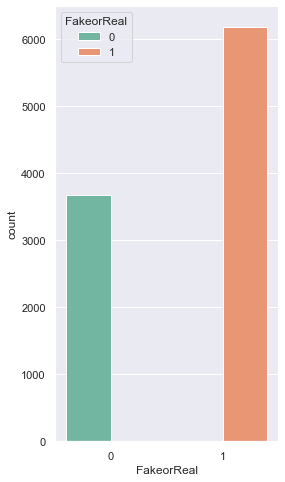

In [31]:
#Seaborn plot of the binary label distribution in the latest converted dataset
fig, ax = plt.subplots(figsize=(4,8))
sns.countplot(x='FakeorReal', hue='FakeorReal', data=final_fyp_newsdata, palette="Set2")
plt.show()

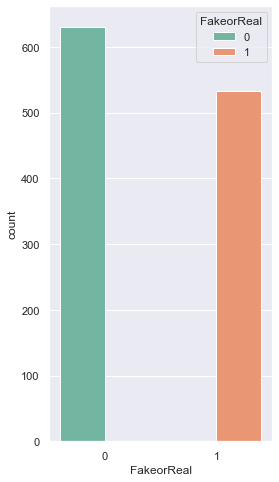

In [32]:
#Seaborn plot of the binary label distribution in the latest converted dataset (web_df)
fig, ax = plt.subplots(figsize=(4,8))
sns.countplot(x='FakeorReal', hue='FakeorReal', data=final_web_df, palette="Set2")
plt.show()

**4.3: DATA PRE-PROCESSING USING NLP: LEMMATIZATION**

Now that we have successfully converted the multi-class labelling system to a binary label system for the dataset, we can proceed to conduct natural language processing to cleanse the dataset using lemmatization. The steps I have taken to accomplish this process is as follows:

1. Converting all the news headline strings to lowercase

2. Substituting all special characters and punctuation found in the news headline string values

3. Extracting all the meaningful words in the news headline string corpus by ignoring the stopwords present in the news title

This allows the linguistical integrity of the news title to not be compromised.


**4.3.1: SimpleNLP + Lemmatization Procedure**

In [33]:
#Initialize lemmatization module object
WordnetLem = WordNetLemmatizer()

In [34]:
#List to store final lemmatized words
res_corpus = []
#List to store lemmatized words for n-gram calculations
lem_ngram_list = []

for data in range(0, len(final_fyp_newsdata)):

    #Main lemmatization procedure
    lem_process_data = re.sub('[^a-zA-Z]', ' ', final_fyp_newsdata['News_Headline'][data])
    lem_process_data = lem_process_data.lower()

    lem_process_data = lem_process_data.split()
    lem_res_data = [WordnetLem.lemmatize(substring) for substring in lem_process_data if not substring in stopwords.words('english')]
    lem_process_data = ' '.join(lem_res_data)
    res_corpus.append(lem_process_data)

    #For n-gram calculations
    for lem_words in lem_res_data:
        lem_ngram_list.append(lem_words)
    


**4.3.3: Corpus Lemmatization Sample Results (First 30)**

In [35]:
#Print the first 30 results of the lemmatization process on the news headlines found in the dataset
res_corpus[:30]

['say osama bin laden endorsed joe biden',
 'say tim tebow kneeled protest abortion national anthem praised fan model american',
 'california registered independent voter able vote republican come',
 'antifa banging resident door seattle demanding food supply get house get vandalized',
 'president obama vice president biden never even tried fix police reform eight year period',
 'prison boxer jack johnson invented patented first wrench white people insulted calling monkey wrench',
 'nazi germany hermann g ring worked defund eliminate police department would interfere brown shirt',
 'point defunding police minneapolis minnesota obama settled million islamics want sharia law',
 'according website black life matter inc charity full fledged corporation location',
 'say photo beaten woman aracely henriquez pregnant woman george floyd assaulted armed robbery',
 'real sense oklahoma flattened curve number case oklahoma declined precipitously',
 'free horse thoroughbred horse need home go suga

**4.3.4: Corpus Lemmatization Sample Results (Last 30)**

In [36]:
#Print the first 30 results of the lemmatization process on the news headlines found in the dataset 
res_corpus[-30:]

['georgia department education implemented new policy beginning august state public school longer accept credit home school entity non traditional education center',
 'federal deficit growing',
 'several day july greenland surface ice cover melted time year satellite observation month estimated ice sheet thawed',
 'republican housing finance reform bill would eliminate person ability obtain year mortgage',
 'fact red light camera change driver behavior cut dangerous type accident',
 'government subsidy renewable energy wind solar time greater given gas coal time greater nuclear industry enjoys',
 'school kid arrested florida make florida nation leader area',
 'provision senate immigration bill would require government permission get second job',
 'president barack obama announced would sign spending bill year unless sequestration spending cut eliminated',
 'federal consumer financial protection bureau collecting financial information monitoring financial information million american wi

**4.4: N-GRAM ANALYSIS**

n-grams are generally referred to a sequence consisting of n words, ranging from 1 --> infinite integer value

Example:

'bus' --> 1 word --> n = 1 --> 1-gram --> unigram

'bus driver' --> 2 words --> n = 2 --> 2-gram --> bigram

'temporary bus driver' --> 3 words --> n = 3 --> 3-gram --> trigram

and so forth.

Employing n-gram analysis in our text classification workflow allows us to rank the frequency of strings (or words) appearing incidentally with each other. This enables us to develop more robust classifier to detect fake or real news in real-world software modules, where input datasets are deployed on a higher scale.

**4.4.1: Bigram Calculation**

In [37]:
#Using nltk ngrams and Series in pandas to count the top 30 commonly occuring bigrams 
finalfypnews_bigrams = (pd.Series(nltk.ngrams(lem_ngram_list, 2)).value_counts())
print(finalfypnews_bigrams[:20])

(donald, trump)         383
(united, state)         290
(hillary, clinton)      263
(barack, obama)         203
(health, care)          195
(say, donald)           136
(new, york)             128
(last, year)            123
(say, president)        111
(say, hillary)          111
(president, barack)     105
(scott, walker)          84
(illegal, immigrant)     82
(president, donald)      82
(president, trump)       76
(minimum, wage)          76
(photo, show)            76
(social, security)       76
(president, obama)       75
(north, carolina)        74
dtype: int64


**4.4.2: Bigrams Plot**

Text(0.5, 0, 'Frequency')

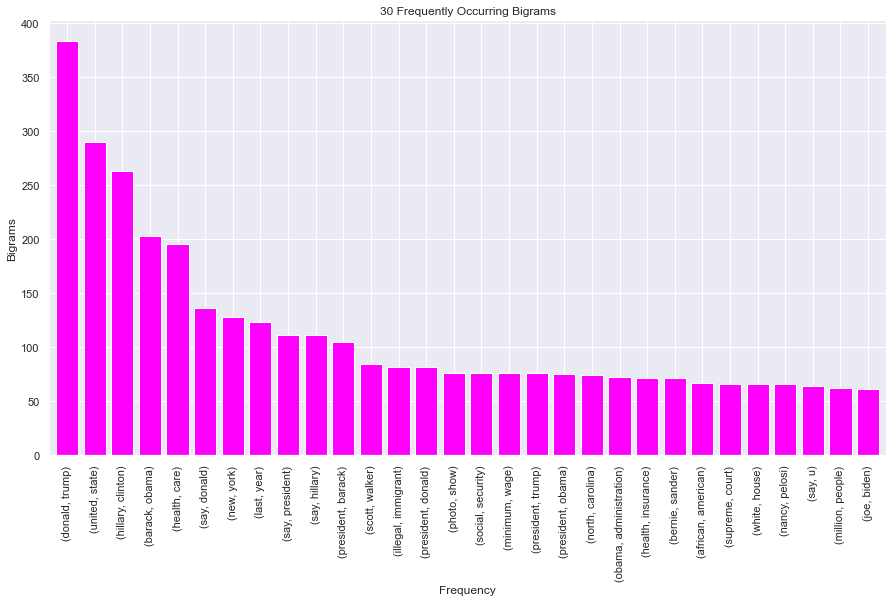

In [38]:
#Plot the 30 frequently occurring bigrams
finalfypnews_bigrams[:30].sort_values(ascending=False).plot.bar(color='magenta', width=.8, figsize=(15,8))
plt.title('30 Frequently Occurring Bigrams')
plt.ylabel('Bigrams')
plt.xlabel('Frequency')

**4.4.3: Trigram Calculation**

In [39]:
#Using nltk ngrams and Series in pandas to count the top 30 commonly occuring trigrams 
finalfypnews_trigrams = (pd.Series(nltk.ngrams(lem_ngram_list, 3)).value_counts())
print(finalfypnews_trigrams[:20])

(say, donald, trump)          135
(say, hillary, clinton)       110
(president, barack, obama)    105
(president, donald, trump)     82
(affordable, care, act)        49
(say, president, barack)       46
(pre, existing, condition)     45
(say, photo, show)             42
(say, president, donald)       38
(say, bernie, sander)          31
(say, u, rep)                  29
(new, york, state)             27
(say, barack, obama)           27
(new, york, city)              27
(donald, trump, said)          26
(say, marco, rubio)            26
(say, scott, walker)           25
(say, joe, biden)              25
(say, nancy, pelosi)           24
(gov, scott, walker)           23
dtype: int64


**4.4.4: Trigrams Plot**

Text(0.5, 0, 'Frequency')

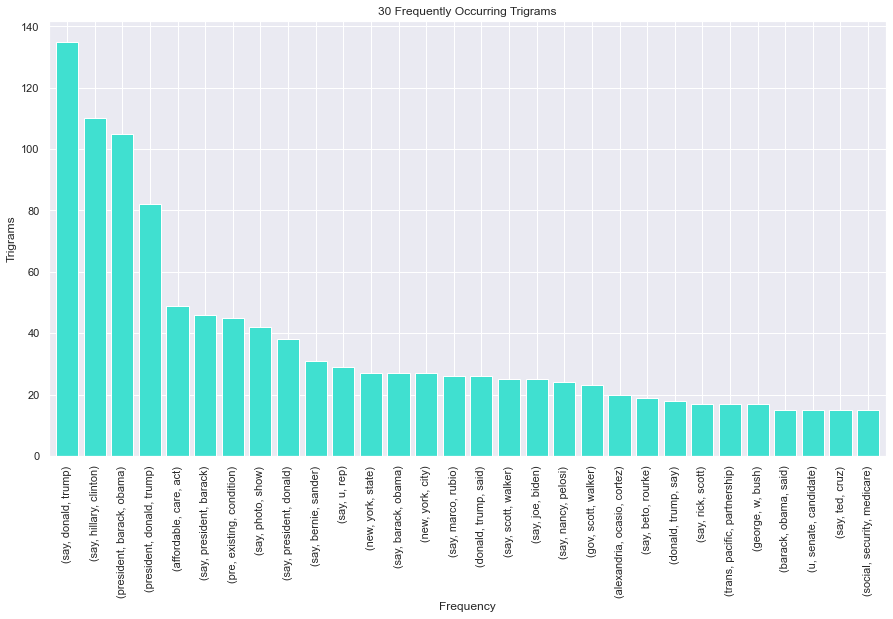

In [40]:
#Plot the 30 frequently occurring trigrams
finalfypnews_trigrams[:30].sort_values(ascending=False).plot.bar(color='turquoise', width=.8, figsize=(15,8))
plt.title('30 Frequently Occurring Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('Frequency')

**4.4.5: 4-gram Calculation**

In [41]:
#Using nltk ngrams and Series in pandas to count the top 30 commonly occuring trigrams 
finalfypnews_fourgrams = (pd.Series(nltk.ngrams(lem_ngram_list, 4)).value_counts())
print(finalfypnews_fourgrams[:20])

(say, president, barack, obama)          46
(say, president, donald, trump)          38
(say, donald, trump, said)               14
(president, barack, obama, said)         11
(high, school, graduation, rate)         11
(people, pre, existing, condition)       11
(say, hillary, clinton, want)            11
(affordable, care, act, say)              9
(say, alexandria, ocasio, cortez)         9
(say, gov, tony, evers)                   9
(say, gov, scott, walker)                 9
(say, nancy, pelosi, said)                8
(president, george, w, bush)              8
(say, donald, trump, want)                8
(former, president, barack, obama)        8
(say, hillary, clinton, said)             7
(u, sen, ron, johnson)                    7
(cut, social, security, medicare)         7
(hillary, clinton, state, department)     7
(say, u, sen, ron)                        7
dtype: int64


**4.4.6: 4-grams Plot**

Text(0.5, 0, 'Frequency')

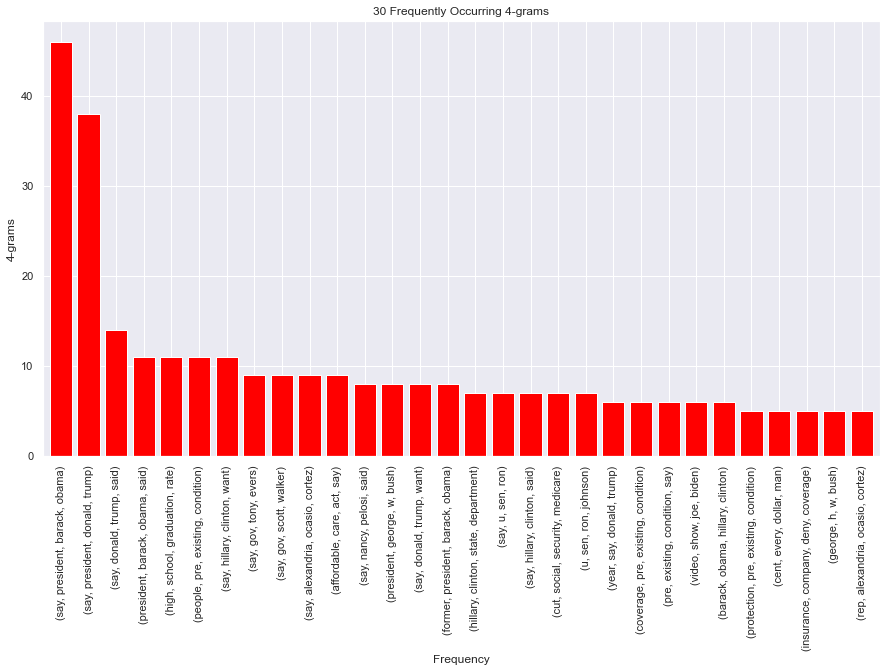

In [42]:
#Plot the 30 frequently occurring 4-grams
finalfypnews_fourgrams[:30].sort_values(ascending=False).plot.bar(color='red', width=.8, figsize=(15,8))
plt.title('30 Frequently Occurring 4-grams')
plt.ylabel('4-grams')
plt.xlabel('Frequency')

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 5</center>**

<center>Text classification setup using the Fake-Real dataset resulting from the SimpleNLP Pipeline.
Employs Machine Learning, Classifiers, Models and Evaluation metric techniques to produce the required results.</center>

**5.1: TEXT CLASSIFICATION MACHINE LEARNING, CLASSIFIER BUILDING AND EVALUATION**


**5.1.1: Approaches**

1. Chapter 6 --> BASELINE MODEL - SimpleNLP + TF-idf + multNB classifier 

2. Chapter 7 --> ALTERNATIVE MODEL - SimpleNLP + TF-idf + Passive Aggressive Classifier

**5.2: IMPORTATION OF NECESSARY CLASSIFIER DEVELOPMENT SKLEARN LIBRARIES**

In [43]:
#Libraries for machine learning, model selection and evaluation workflows
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Libraries for text classification and vectorization procedures
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 6</center>**

<center>Baseline Performance Model: SimpleNLP + TF-IDF Approach + Multinomial Naive Bayes Classifier</center>

**6.1: BASELINE PERFORMANCE MODEL FOR FAKE/REAL NEWS CLASSIFICATION**

**Data fitting using the TfidfVectorizer module**

In [44]:
#Implement the TfidfVectorizer module
tfidf_vectorize = TfidfVectorizer()

#Fit the X data of all the headlines into an array format
X_idf = tfidf_vectorize.fit_transform(res_corpus).toarray()
#Assign the values of the 'FakeorReal' column in the headlines dataset to the y data
y_idf = final_fyp_newsdata['FakeorReal']

**Train and Test data split**

In [45]:
#Split up the data into training sets and testing sets to be used for text classification
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_idf, y_idf, test_size = 0.33, random_state = 0)


In [46]:
#Convert the X training data into a data frame that is represented as features
tfidf_df = pd.DataFrame(X_train_idf, columns = tfidf_vectorize.get_feature_names())

In [47]:
#Print the first 5 results of the tf-idf vectorization
tfidf_df.head(5)

,aa,aaa,aaron,aarp,ab,abaco,abandoned,abbas,abbott,abc,...,zombie,zone,zoning,zoo,zoom,zpass,zuber,zucker,zuckerberg,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Implementing the multinomial NB classifier 
NB_classify_tfidf = MultinomialNB()

#Fitting the X_train and y_train data into the classifier for training
NB_classify_tfidf.fit(X_train_idf, y_train_idf)

MultinomialNB()

**y_pred Prediction using the X_test data in the TF-IDF model**

In [49]:
#Predict the news labels for the test data using the multinomial NB classifier
y_pred_idf = NB_classify_tfidf.predict(X_test_idf)

**6.1.1: CONFUSION MATRIX FOR BASELINE MODEL**

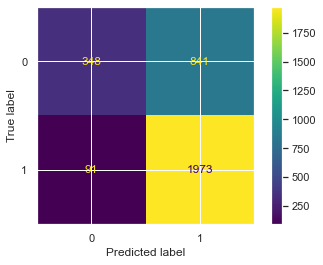

In [50]:
#Module to plot a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix for y_pred results
con_matrix_tfidf  = metrics.confusion_matrix(y_test_idf, y_pred_idf)

#Confusion Matrix Plot
result_plot = ConfusionMatrixDisplay(confusion_matrix = con_matrix_tfidf, display_labels = NB_classify_tfidf.classes_)
result_plot.plot()
plt.show()

**6.1.2: ACCURACY SCORE FOR BASELINE MODEL**

In [51]:
#Calculate and print the accuracy score using the sklearn library
acc_score_idf = metrics.accuracy_score(y_test_idf, y_pred_idf)
print('Accuracy Score: ', round(acc_score_idf*100,2), '%')

Accuracy Score:  71.35 %


**6.1.3: RECALL SCORE FOR BASELINE MODEL**

In [52]:
#Calculate and print the recall score using the sklearn library
recall_score_idf = metrics.recall_score(y_test_idf, y_pred_idf)
print('Recall Score: ', round(recall_score_idf*100,2), '%')

Recall Score:  95.59 %


**6.1.4: PRECISION SCORE FOR BASELINE MODEL**

In [53]:
#Calculate and print the precision score using the sklearn library
precision_score_idf = metrics.precision_score(y_test_idf, y_pred_idf)
print('Precision Score: ', round(precision_score_idf*100,2), '%')

Precision Score:  70.11 %


**6.2: CLOSING STATEMENTS FOR BASELINE MODEL (TF-IDF)**

From the above results, we can conclude that while a high accuracy (71.35%) is not achieved with the TF-IDF approach and multi-nomial NB classifier model, there is significant room for improvement from here on out.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 7</center>**

<center>Alternative Classification Performance Model: SimpleNLP + TF-IDF Approach + Passive Aggressive Classifier</center>

**7.1: ALTERNATIVE CLASSIFICATION MODEL FOR FAKE/REAL NEWS CLASSIFICATION**

In [54]:
#Library for alternative classification procedure
from sklearn.linear_model import PassiveAggressiveClassifier

In [55]:
#Assigning previously split data to another variable for transition into new classification model
X_train_paggro = X_train_idf
X_test_paggro = X_test_idf
y_train_paggro = y_train_idf
y_test_paggro = y_test_idf

In [56]:
##Implementing the passive aggressive classifier 
PaggroClassify = PassiveAggressiveClassifier(max_iter = 300)
#Fitting the X_train and y_train data into the passive aggressive classifier for training
PaggroClassify.fit(X_train_paggro, y_train_paggro)

#Predict the news labels for the test data using the passive aggressive classifier
y_pred_paggro = PaggroClassify.predict(X_test_paggro)

**7.1.1: CONFUSION MATRIX FOR ALTERNATIVE CLASSIFICATION MODEL**

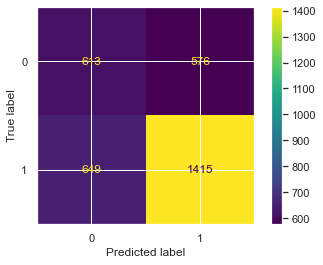

In [57]:
#Confusion Matrix for y_pred results
con_matrix_paggro  = metrics.confusion_matrix(y_test_paggro, y_pred_paggro)

#Confusion Matrix Plot
result_plot_paggro = ConfusionMatrixDisplay(confusion_matrix = con_matrix_paggro, display_labels = PaggroClassify.classes_)
result_plot_paggro.plot()
plt.show()

**7.1.2: ACCURACY SCORE FOR ALTERNATIVE CLASSIFICATION MODEL**

In [58]:
#Calculate and print the accuracy score using the sklearn library
acc_score_paggro = metrics.accuracy_score(y_test_paggro, y_pred_paggro)
print('Accuracy Score: ', round(acc_score_paggro*100,2), '%')

Accuracy Score:  62.34 %


**7.1.3: RECALL SCORE FOR ALTERNATIVE CLASSIFICATION MODEL**

In [59]:
#Calculate and print the recall score using the sklearn library
recall_score_paggro = metrics.recall_score(y_test_paggro, y_pred_paggro)
print('Recall Score: ', round(recall_score_paggro*100,2), '%')

Recall Score:  68.56 %


**7.1.4: PRECISION SCORE FOR ALTERNATIVE CLASSIFICATION MODEL**

In [60]:
#Calculate and print the precision score using the sklearn library
precision_score_paggro = metrics.precision_score(y_test_paggro, y_pred_paggro)
print('Precision Score: ', round(precision_score_paggro*100,2), '%')

Precision Score:  71.07 %


**7.2: CLOSING STATEMENTS FOR ALTERNATIVE CLASSIFICATION APPROACH**


The passive aggressive classification approach was an alternative approach that was executed with the hopes of achieving a better text classification and fake-real news predictive accuracy as compared to the baseline model. However, from the above results, we can conclude that an undesirable accuracy (63.14%) is achieved with the TF-IDF approach and passive aggressive classifier model. 

In a nutshell, it can be deduced that this is due to the less competitive SimpleNLP pipeline I have implemented during my data cleaning phase of the dataset. 

There is significant room for improvement in the text pre-processing phase of this project and this can positively anticipated to be achieved with the EDC-NLP pipeline I have implemented in the upcoming chapter.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 8</center>**

<center>Extensive Data Cleanse NLP (EDC-NLP) Pipeline: A sophisticated and comprehensive pipeline as compared to the SimpleNLP approach</center>

**8.1: Improved data cleansing and pre-processing procedure on the original Fake-Real News Dataset**

I have implemented the following functions as will be shown in an attempt to effectively clean the text corpus of common linguistic hindrances which may cause errors and pose as inaccurate contextual indicators on the news headlines being classified. 

These functions will be collatively implemented into 2 driver functions representing an improved NLP pipeline which I have dubbed the EDC-NLP pipeline as part of this project.


**8.2: EDC-NLP Pipeline Sub Functional Definitions 1 (text_deepcleanser(input_str))**

In [61]:
# 1. Removal of Links, Whitespaces, Newlines, Tabs, Accented Characters, Special Characters, HTML tags, lowercase conversion
def LWNT_remover_caseconverter(input_HL):
    
    '''
    This function performs a comprehensive cleaning of text as follows:
    - Removing newlines and tabs
    - Removing HTML tags
    - Removing links
    - Removing accented characters
    - Removing extra whitespaces
    - Removing special characters
    - Converting the text to lowercase
    
    Arguments:
    - input_HL (str): News headline input from the dataset as a text string
    
    Returns:
    - A cleaned input_HL string with all the above operations applied
    '''
    
    #Initialising the newline character types to be removed
    LWNT_list = ['\\n', '\n', '\t', '\\', '. com']
    
    #Remove newlines and tabs
    for lwnt in LWNT_list:
        input_HL = input_HL.replace(lwnt, ' ')
        
    #Remove HTML tags
    input_HL = html.unescape(re.sub(r'<.*?>', ' ', input_HL))
    
    #Remove links
    input_HL = re.sub(r'https?://\S+|www\.\S+|\S+\.com\S*', '', input_HL)
    
    #Remove accented characters
    input_HL = unicodedata.normalize('NFKD', input_HL).encode('ASCII', 'ignore').decode('utf-8')
    
    #Remove extra whitespaces
    input_HL = re.sub(r'\s+', ' ', input_HL).strip()
    
    #Remove special characters
    input_HL = re.sub(r'[^*:$-,%.?!a-zA-Z0-9]+', ' ', input_HL) 
    
    #Converting the final resultant text to lower case
    input_HL = input_HL.lower()
    
    return input_HL


# 2. Reduction of Repetitive Characters, Punctuations
def repeat_punc_reducer(input_txt):
    
    '''
    This function formats the input text by reducing repetition to 2 characters
    for alphabets and to 1 character for punctuations
    
    Arguments:
    - input_txt (str): The text to be formatted
        
    Returns:
    - A formatted text with alphabets repeating upto two characters 
    and punctuations limited to one repetition
    '''
    
    #Replace repeated alphabets and punctuations with 1 or 2 characters
    regex_ptn = re.compile(r"([A-Za-z])\1{1,}|([.,/#!$%^&*?;:{}=_`~()+-])\2{1,}")
    res_txt = regex_ptn.sub(lambda x: x.group(1) if x.group(1) else x.group(2), input_txt)
    
    #Replace repeated spaces with 1 space
    final_res_txt = re.sub(' {2,}', ' ', res_txt)
    
    return final_res_txt


# 3. Expansion of contracted words
def expand_contractions(input_string):
    
    '''
    This function expands common contraction words found in the input string
    
    Arguments:
    - input_string (str): The text string containing possible contraction words to be expanded
        
    Returns:
    - A formatted resulting text string with the contraction words expanded
    '''
    
    #Expand the contraction words using .fix from the contractions library
    return contractions.fix(input_string)


# 4. Spelling Correction using Autocorrection Python module
def correct_speller(input_text):
    
    '''
    This function checks for misspelled words in a given input string
    
    Arguments:
    - input_text (str): The text string containing possibly misspelled words
    
    Returns:
    - A formatted resulting text string with correctly spelt words
    
    '''
    
    #Switch spell checker to the English language
    spell = Speller(lang='en')
    #Autocorrect mispelled words in the string
    final_text = spell(input_text)
    
    return final_text




**8.3: Extensive Data Cleanse Driver Function**

Driver function to perform all the textual data cleaning procedures to obtain a well formatted, cleaned textual data point in the final dataset for Fake and Real news text classification.

In [62]:
def text_deepcleanser(input_text):
    
    '''
    This function applies all the previously defined functions which perform the 
    respective data cleansing operations on the input text string data
    
    Arguments:
    - input_text (str): The input text string that needs deep cleansing and formatting
    
    Returns:
    - A well formatted, cleaned text string 
    '''
    
    #LWNT_remover_caseconverter
    inter_text = LWNT_remover_caseconverter(input_text)
    
    #repeat_punc_reducer
    inter2_text = repeat_punc_reducer(inter_text)
    
    #expand_contractions
    inter3_text = expand_contractions(inter2_text)
    
    #correct_speller
    final_cleaned_text = correct_speller(inter3_text)
    
    return final_cleaned_text


**8.4: EDC-NLP Pipeline Sub Functional Definitions 2 (lmatze_and_rmvstopwrd(input_str))**

In [63]:
#1. Stopwords Removal Function
def rmv_stopwords(input_text):
    
    '''
    This function removes stopwords from the input text.
    Stopwords are words that can be removed from a given string without trading-off the context
    of the string.
    
    Arguments:
    - input_text (str): The input text containing possible stopwords
        
    Returns:
    - The resultant text after removing the stopwords with the preserved meaning of the context
    '''
    
    #Retrieve the stopwords set for the English language
    stoplist = set(stopwords.words('english'))
    
    #Tokenize the input text
    tkns = word_tokenize(input_text)
    
    #Remove stopwords from the tokenized list
    f_tokens = [token for token in tkns if token.lower() not in stoplist]
    
    #Join the filtered tokens to form the modified text
    res_text = ' '.join(f_tokens)
    
    return res_text

#2. Lemmatization Function
def lmatzer(input_text):
    
    '''
    This function lemmatizes an input text by converting the words into their root form
    
    Arguments:
    - input_text (str): The input text containing words in their non-root format
    
    Returns:
    - The resultant text with words lemmatized into their root form    
    '''

    #Tokenize the text into words
    tkns = w_tokenizer.tokenize(input_text)
    
    #Lemmatize each word and join them back into a string
    lemmas = [WordNetLemmatizer().lemmatize(token, 'v') for token in tkns]
    res_lem_text = ' '.join(lemmas)
    
    return res_lem_text


**8.5: Lemmatization and Stopwords Removal Driver Function**

Driver function to perform the stopword removal and lemmatization procedure on the cleaned textual data in the dataset

In [64]:
def lmatze_and_rmvstopwrd(input_str):
    
    '''
    This function executes the stopword removal and lemmatization operations on the 
    input text string
    
    Arguments:
    - input_str (str): 
    
    Returns:
    - A resultant text string with the stopwords removed and lemmatized words in the final text string
    '''
    
    #Stopword removal
    inter_str = rmv_stopwords(input_str)
    
    #Lemmatization
    final_str = lmatzer(inter_str)
    
    return final_str

**8.6: The EDC_NLP() function**

This is the final EDC-NLP pipeline function "EDC_NLP(input_str)" that is implemented comprising of the 2 driver functions:

1. text_deepcleanser(input_str)
2. lmatze_and_rmvstopwrd(input_str)

In [65]:
def EDC_NLP(input_text):
    
    '''
    This function collates and performs text pre-processing techniques after careful 
    analysis of the dataset. It also performs the stopword removal and lemmatization 
    procedures on the cleaned text data to produce an effective text classification 
    input in accordance with the aim of the project
    
    Arguments:
    - input_text (str): Raw news_headline text data from the Fake-Real news dataset
    
    Returns:
    - Processed, lemmatized text data for text classification and neural network input usage
    
    '''
    
    #Deep clean text data using pre-processing techniques
    cleaned_text = text_deepcleanser(input_text)
    
    #Perform stopword removal and lemmatization on cleaned text data
    final_clsf_text = lmatze_and_rmvstopwrd(cleaned_text)

    return final_clsf_text

**8.7: Processing the Fake-Real News Dataset using the EDC-NLP Pipeline**

In [66]:
#Copy the binary classified Fake-Real News dataframe into a new dataframe
EDC_fyp_newsdata = final_web_df.copy(deep=True)

In [67]:
def EDC_Process(df):
    
    '''
    This function performs the EDC_NLP() pipeline operations on the entire
    binary classified Fake-Real news dataset
    
    Arguments:
    - df (pandas Dataframe): Input dataframe of the dataset
    
    ReturnsL
    - initial_df (pandas Dataframe): original input dataframe of the dataset
    - final_df (pandas Dataframe): processed dataframe of the dataset
    '''
    
    #Copy input dataframe as initial dataframe for comparison
    initial_df = df.copy(deep=True)

    #Assign input dataframe to be modified
    final_df = df
    
    #Apply the EDC_NLP() function on all the news headlines in the Fake-Real News Binary dataset
    final_df['Processed_Headline'] = [EDC_NLP(txt) for txt in final_df['Final_News_Content']]
    
    #Shift the last column containing processed text headline into the first column for the 
    #final output dataframe
    pop_out_col = final_df.pop('Processed_Headline')
    final_df.insert(0, 'Processed_Headline', pop_out_col)
    
    return initial_df, final_df

**8.7.1: Main EDC-NLP Pipeline Process on Binary Classified Fake-Real News Dataset**

In [68]:
import datetime
import time

#Get start datetime
start_time = datetime.datetime.now()

#Function Implementation
original_df, result_df = EDC_Process(EDC_fyp_newsdata)

#Get end datetime
end_time = datetime.datetime.now()

#Execution Time
elapsed_time = end_time - start_time
print('Execution time:', elapsed_time, 'seconds')

Execution time: 1:44:08.109690 seconds


In [69]:
#Original Binary Classified Fake-Real News Dataset
original_df

,Final_News_Content,FakeorReal
0,Says Osama bin Laden endorsed Joe Biden\n\n\n\...,0
1,Says Tim Tebow �kneeled in protest of abortion...,0
2,California�s registered independent voters �wi...,0
3,�Antifa now banging on residents� doors in Sea...,0
4,�President Obama and Vice President Biden neve...,0
...,...,...
8528,"""Nearly 7 million Floridians have pre-existing...",1
8529,"Says Mike DeWine took $40,000 from ECOT and ""d...",1
8530,"""When two judges said it was illegal to fire a...",1
8531,"Says Andrew Gillum ""wants to abolish ICE and d...",1


In [70]:
#EDC-NLP Processed Binary Classified Fake-Real News Dataset
result_df

,Processed_Headline,Final_News_Content,FakeorReal
0,say obama bin lade endorse joe biden politifac...,Says Osama bin Laden endorsed Joe Biden\n\n\n\...,0
1,say tim need protest abortion national anthem ...,Says Tim Tebow �kneeled in protest of abortion...,0
2,california register independent voters wil abl...,California�s registered independent voters �wi...,0
3,"anti bang residents settle , demand & supply ....",�Antifa now banging on residents� doors in Sea...,0
4,president obama vice president biden never eve...,�President Obama and Vice President Biden neve...,0
...,...,...,...
8528,nearly 7 million floridians pre exist conditio...,"""Nearly 7 million Floridians have pre-existing...",1
8529,"say mike define tok $ 40,000 eco nothing onlin...","Says Mike DeWine took $40,000 from ECOT and ""d...",1
8530,two judge say legal fire teacher view pornogra...,"""When two judges said it was illegal to fire a...",1
8531,say andrew film want abolish ice believe type ...,"Says Andrew Gillum ""wants to abolish ICE and d...",1


In [71]:
#Copy the final result dataframe into a new dataframe shell
usage_df = result_df.copy(deep=True)
#Drop the original raw format News_Headline column
final_usage_df = usage_df.drop(usage_df.columns[1], axis = 1)

In [72]:
#Final Dataframe for Fake News Detection Text Classification Use
final_usage_df

,Processed_Headline,FakeorReal
0,say obama bin lade endorse joe biden politifac...,0
1,say tim need protest abortion national anthem ...,0
2,california register independent voters wil abl...,0
3,"anti bang residents settle , demand & supply ....",0
4,president obama vice president biden never eve...,0
...,...,...
8528,nearly 7 million floridians pre exist conditio...,1
8529,"say mike define tok $ 40,000 eco nothing onlin...",1
8530,two judge say legal fire teacher view pornogra...,1
8531,say andrew film want abolish ice believe type ...,1


**8.8: Closing Statements for EDC-NLP Pipeline Processing**

To conclude this chapter, we can observe that we have successfully accomplished a proper data cleaning procedure on the text data present in the Binary Classified Fake-Real News Dataset.

We have performed the relevant linguistical operations to clean out and present a well formatted news headline for each record in the dataset. Additionally, we have removed the stopwords and executed lemmatization to produce the above resultant dataset as a proper input vehicle for machine learning, text classification, and deep neural network workflows to detect fake news with improved accuracy.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 9</center>**

**<center>BERT APPROACH</center>** 

**9.1: Train-Test Split for BERT Model Data**

In [73]:
#Assign the relevant X and y data from the processed dataset
bert_X = final_usage_df['Processed_Headline']
bert_y = final_usage_df['FakeorReal']

#Train-Test Split of the assigned X and y data
bertX_train, bertX_test, berty_train, berty_test = train_test_split(bert_X, bert_y, stratify = bert_y, test_size = 0.2, random_state = 10)



**9.2: Tokenization using AutoTokenizer**

In [74]:
#Install the transformers library to import the AutoTokenizer module
!pip install transformers

In [75]:
#Import the AutoTokenizer module
from transformers import AutoTokenizer

#Access annd download the base BERT model from the transformers library
bert_token = AutoTokenizer.from_pretrained('bert-base-uncased')

In [76]:
#Function to auto tokenize the input data from the processed data for the BERT Model
def autotknz_data(in_data):
    
    '''
    This function tokenizes the input data from the processed Fake-Real News Dataset to 
    be fed into the BERT model for Fake News text classification and hence prediction
    
    Arguments:
    - in_data (Series): Input train and test X data (Processed News Headlines)
    
    Returns:
    - tknz_data (transformers Tokens): Tokenized train and test processed news headline text data
    '''
    
    #Convert and assign the Series input data into a list
    input_text_list = list(in_data)
    
    #Auto-tokenize the input data using the AutoTokenizer module for the base BERT model
    tknz_data = bert_token(text = input_text_list, add_special_tokens = True, max_length = 100, truncation = True,
                          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False,
                          return_attention_mask = True, verbose = True)
    
    return tknz_data

In [77]:
#Implement the above defined function to tokenize the input data for input into the BERT model
tokened_bertX_train = autotknz_data(bertX_train)
tokened_bertX_test = autotknz_data(bertX_test)

**9.3: BERT Model Architecture & Design**

In [78]:
#Import tensorflow optimization modules
from transformers import TFBertModel
from tensorflow.keras.optimizers import Adam
import tensorflow as tensorF

#Import keras model building modules
from keras.layers import Input, Dense, Dropout, Embedding
from keras.models import Model, Sequential

#Access annd loading the base BERT model 
TF_model_bert = TFBertModel.from_pretrained('bert-base-uncased')


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [79]:
#Function to design the BERT model architecture using dense, dropout layers, optimization and loss values
def BERT_Ops_Model():
    
    '''
    This function designs and optimizes the BERT model architecture
    '''

    #Define input vectors and embeddings
    input_id = Input(shape = (100,), dtype = tensorF.int32, name = 'input_id')
    att_masks = Input(shape = (100,), dtype = tensorF.int32, name = 'att_masks')
    embedgs = TF_model_bert([input_id, att_masks])[1]
    
    #Build dense/dropout layer architecture
    output_1 = Dropout(0.2)(embedgs)
    output_2 = Dense(64, activation = 'relu')(output_1)
    output_3 = Dropout(0.2)(output_2)
    output_4 = Dense(64, activation = 'relu')(output_3)
    output_5 = Dense(64, activation = 'relu')(output_4)
    output_6 = Dropout(0.2)(output_5)
    y = Dense(1, activation = 'sigmoid')(output_6)
    
    #Instantiate layer built model
    final_model = Model(inputs = [input_id, att_masks], outputs = y)
    final_model.layers[2].trainable = True
    
    #Optimization
    optmz = Adam(learning_rate = 1e-03, epsilon = 1e-04, decay = 0.01, clipnorm = 1.0)
    
    #Model Compilation
    final_model.compile(optimizer = optmz, loss = 'binary_crossentropy', metrics = 'accuracy') 
    
    return final_model

**9.4: BERT Model Training**

In [80]:
#Training my designed BERT model 
getBert = BERT_Ops_Model()

from keras.callbacks import EarlyStopping

bert_fit = getBert.fit(x = {'input_id': tokened_bertX_train['input_ids'],
                           'att_masks': tokened_bertX_train['attention_mask']},
                      y = berty_train,
                      epochs = 5,
                      validation_split = 0.2,
                      batch_size = 64,
                      callbacks = [EarlyStopping(monitor = 'val_accuracy', mode = 'max',
                                                patience = 3, verbose = False,
                                                restore_best_weights = True)])


Epoch 1/5
12/12 [==============================] - 249s 20s/step - loss: 0.7057 - accuracy: 0.5336 - val_loss: 0.7274 - val_accuracy: 0.4462
Epoch 2/5
12/12 [==============================] - 222s 18s/step - loss: 0.7028 - accuracy: 0.5013 - val_loss: 0.6872 - val_accuracy: 0.5538
Epoch 3/5
12/12 [==============================] - 504s 44s/step - loss: 0.6979 - accuracy: 0.5296 - val_loss: 0.7013 - val_accuracy: 0.4462
Epoch 4/5
12/12 [==============================] - 602s 50s/step - loss: 0.7005 - accuracy: 0.4879 - val_loss: 0.6866 - val_accuracy: 0.5538
Epoch 5/5
12/12 [==============================] - 630s 53s/step - loss: 0.6992 - accuracy: 0.5081 - val_loss: 0.6855 - val_accuracy: 0.5538


**9.4.1: Plot the BERT model architecture design**

In [124]:
getBert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_id (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 att_masks (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_id[0][0]',               
                                thPoolingAndCrossAt               'att_masks[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

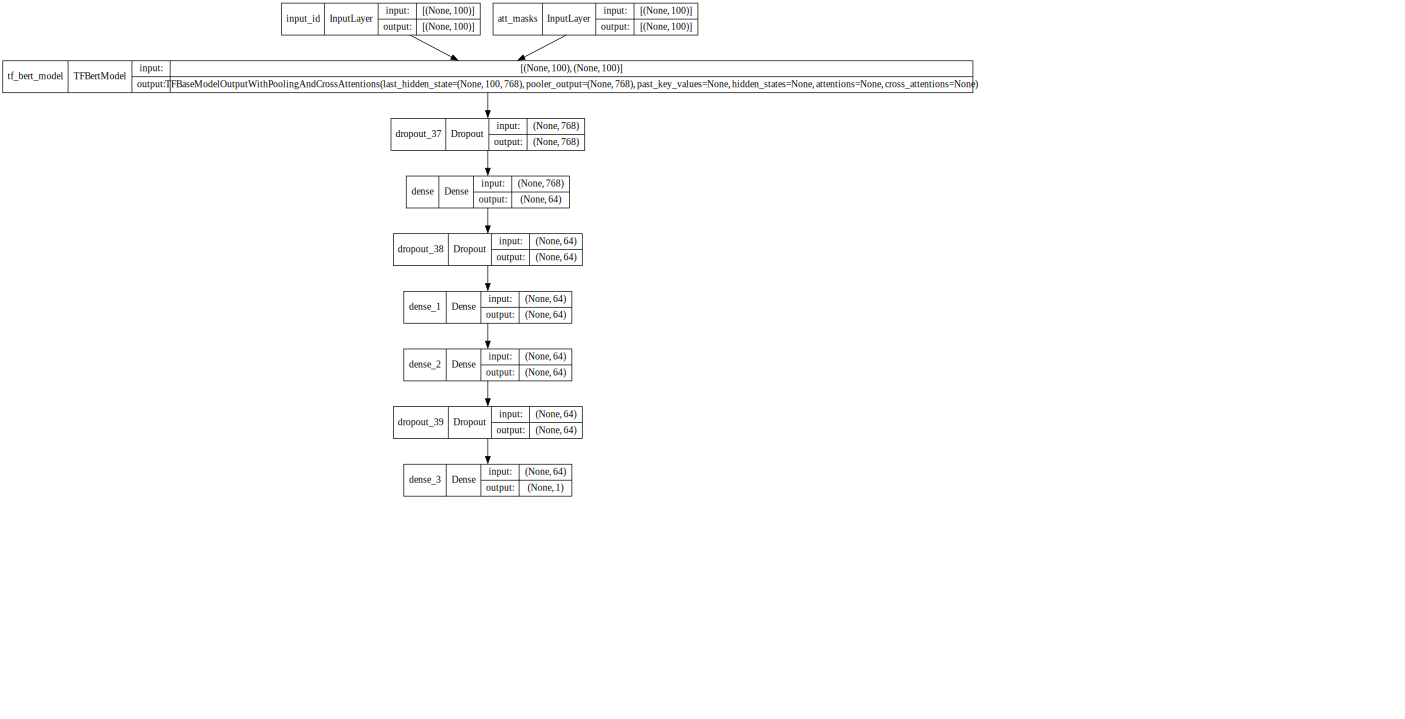

In [123]:
import keras
from keras.utils.vis_utils import model_to_dot
import pydot as pyd
keras.utils.vis_utils.pydot = pyd

from IPython.display import SVG

#Plot CNN Deep Learning Model Architecture
SVG(model_to_dot(getBert, show_shapes = True, show_layer_names = True, dpi = 50).create(prog = 'dot', format = 'svg'))



**9.5: BERT Model Predictive Effectiveness Evaluation**

In [81]:
#Model Evaluation on Unseen Test Data
bert_y_pred = getBert.predict({'input_id' : tokened_bertX_test['input_ids'] , 
                               'att_masks' : tokened_bertX_test['attention_mask']}).round() 



In [82]:
#Calculate and print the accuracy score using the sklearn library
bert_accuracy_score = metrics.accuracy_score(np.array(berty_test), np.array(bert_y_pred))
print('Accuracy Score: ', round(bert_accuracy_score*100,2), '%')



Accuracy Score:  54.08 %


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 10</center>**

**<center>DEEP LEARNING APPROACH - SELF-DEVELOPED MODELS, USING VARIED DEEP LEARNING METHODS</center>**

<center>1. EDC-NLP + CNN DEEP LEARNING MODEL - CNN Network model</center>
<center>2. EDC-NLP + RCNN + LSTM DEEP LEARNING MODEL - RCNN + LSTM Network model</center>

**10.1: EDC-NLP + CNN DEEP LEARNING MODEL**

**10.1.1: Train-Test Split for CNN Deep Learning Model**

In [83]:
#Import keras models and layers for model architecture
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D

#Import padding and tokenizers for text data pre-processing
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

#Assign the relevant X and y data from the processed dataset
deep_X = final_usage_df['Processed_Headline']
deep_y = final_usage_df['FakeorReal']

#Train-Test Split of the assigned X and y data
deepX_train, deepX_test, deep_y_train, deep_y_test = train_test_split(deep_X, deep_y, test_size = 0.2, random_state = 35)

**10.1.2: Tokenization and Padding for CNN Deep Learning Model**

In [84]:
#Maximum news content length
max_news_length = 10000

#Initialise the Tokenizer from keras
tknzer = Tokenizer(num_words = max_news_length)

#Fit tokenizer to the training data
tknzer.fit_on_texts(deepX_train)

#Create token IDs using text sequence conversions
X_train_deepseq = tknzer.texts_to_sequences(deepX_train)
X_test_deepseq = tknzer.texts_to_sequences(deepX_test)

#Maximum text sequence length
max_seq = 1000

#Sequence padding with zeros / truncation to maximum length
deepPadX_train = pad_sequences(X_train_deepseq, maxlen = max_seq, padding = 'post', truncating = 'post')
deepPadX_test = pad_sequences(X_test_deepseq, maxlen = max_seq, padding = 'post', truncating = 'post')

**10.1.3: EDC-NLP + CNN Deep Learning Model Architecture Design**

In [85]:
#Building the CNN deep learning model architecture using dense, spatial dropout, dropout,
#convolutional layers, pooling layers,
#optimization and loss values
deepCNN_model = Sequential()
deepCNN_model.add(Embedding(max_news_length, 128, input_length = max_seq))
deepCNN_model.add(SpatialDropout1D(0.2))
deepCNN_model.add(Conv1D(128, 5, activation = 'relu'))
deepCNN_model.add(GlobalMaxPooling1D())
deepCNN_model.add(Dense(1, activation = 'sigmoid'))
deepCNN_model.add(Dropout(0.2))

#Model Compilation
deepCNN_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [86]:
#Model Summary
deepCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 128)        0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
 dropout_40 (Dropout)        (None, 1)                 0

**10.1.4: Plot the architectural design of the CNN Model**

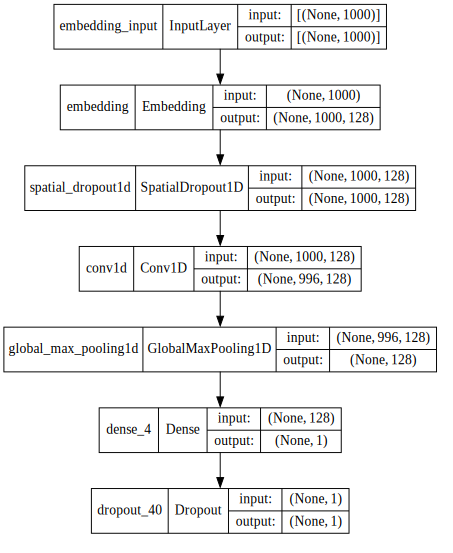

In [87]:
import keras
from keras.utils.vis_utils import model_to_dot
import pydot as pyd
keras.utils.vis_utils.pydot = pyd

from IPython.display import SVG

#Plot CNN Deep Learning Model Architecture
SVG(model_to_dot(deepCNN_model, show_shapes = True, show_layer_names = True, dpi = 70).create(prog = 'dot', format = 'svg'))



**10.1.5: Training the EDC-NLP + CNN Deep Learning Model**

In [88]:
#Training my designed CNN model
deepCNN_hist = deepCNN_model.fit(deepPadX_train, deep_y_train, validation_data=(deepPadX_test, deep_y_test), epochs=10, batch_size=64)

Epoch 1/10
15/15 [==============================] - 8s 460ms/step - loss: 2.0529 - accuracy: 0.5968 - val_loss: 0.5916 - val_accuracy: 0.5880
Epoch 2/10
15/15 [==============================] - 7s 439ms/step - loss: 1.9339 - accuracy: 0.7376 - val_loss: 0.5056 - val_accuracy: 0.7382
Epoch 3/10
15/15 [==============================] - 7s 445ms/step - loss: 1.8334 - accuracy: 0.7527 - val_loss: 0.4179 - val_accuracy: 0.8412
Epoch 4/10
15/15 [==============================] - 7s 444ms/step - loss: 1.8666 - accuracy: 0.7925 - val_loss: 0.3304 - val_accuracy: 0.8755
Epoch 5/10
15/15 [==============================] - 7s 442ms/step - loss: 1.6023 - accuracy: 0.8656 - val_loss: 0.2221 - val_accuracy: 0.9442
Epoch 6/10
15/15 [==============================] - 7s 440ms/step - loss: 1.5812 - accuracy: 0.8806 - val_loss: 0.1337 - val_accuracy: 0.9657
Epoch 7/10
15/15 [==============================] - 7s 471ms/step - loss: 1.6400 - accuracy: 0.8892 - val_loss: 0.0911 - val_accuracy: 0.9700
Epoch 

**10.1.6: EDC-NLP + CNN Deep Learning Model Prediction**

In [89]:
#Model Prediction on Unseen Padded Test Data
deepCNN_y_pred = (deepCNN_model.predict(deepPadX_test) > 0.5).astype(int)

**10.1.7: EDC-NLP + CNN Deep Learning Model Evaluation**

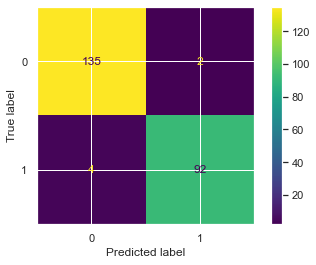

Accuracy Score:  97.42 %
Precision Score:  97.87 %
Recall Score:  95.83 %
F1 Score:  96.84 %


In [90]:
#Model Performance Evaluation - Deep CNN model

#Module to plot a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix
deepCNN_con_matx = metrics.confusion_matrix(deep_y_test, deepCNN_y_pred)

#Confusion Matrix Plot
deepCNN_cf_plot = ConfusionMatrixDisplay(confusion_matrix = deepCNN_con_matx)
deepCNN_cf_plot.plot()
plt.show()


#Accuracy Score
deepCNN_accuracy = metrics.accuracy_score(deep_y_test, deepCNN_y_pred)
print('Accuracy Score: ', round(deepCNN_accuracy*100,2), '%')


#Precision Score
deepCNN_precision = metrics.precision_score(deep_y_test, deepCNN_y_pred)
print('Precision Score: ', round(deepCNN_precision*100,2), '%')

#Recall Score
deepCNN_recall = metrics.recall_score(deep_y_test, deepCNN_y_pred)
print('Recall Score: ', round(deepCNN_recall*100,2), '%')

#F1 Score
deepCNN_f1 = metrics.f1_score(deep_y_test, deepCNN_y_pred)
print('F1 Score: ', round(deepCNN_f1*100,2), '%')

**10.2: RCNN + LSTM DEEP LEARNING MODEL**

**10.2.1: Train Test Split for RCNN + LSTM Deep Learning Model**

In [91]:
#Import model building libraries
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate, LSTM, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model


#Import padding and tokenizers for text data pre-processing
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


#Assign the relevant X and y data from the processed dataset
RCTM_X = final_usage_df['Processed_Headline']
RCTM_y = final_usage_df['FakeorReal']


#Train-Test Split of the assigned X and y data
RCTM_X_train, RCTM_X_test, RCTM_y_train, RCTM_y_test = train_test_split(RCTM_X, RCTM_y, test_size = 0.2, random_state = 56)



**10.2.2: Tokenization and Padding for RCNN + LSTM Deep Learning Model**

In [92]:
#Maximum input news data length
RCTM_max_news_length = 10000

#Initialise the Tokenizer from keras
RCTM_tknzr = Tokenizer(num_words = RCTM_max_news_length)

#Fit tokenizer to the training data
RCTM_tknzr.fit_on_texts(RCTM_X_train)

#Create token IDs using text sequence conversions
RCTM_seq_X_train = RCTM_tknzr.texts_to_sequences(RCTM_X_train)
RCTM_seq_X_test = RCTM_tknzr.texts_to_sequences(RCTM_X_test)

#Maximum text sequence length
RCTM_max_seq = 1000

#Sequence padding
RCTMPad_X_train = pad_sequences(RCTM_seq_X_train, maxlen = RCTM_max_seq, padding = 'post', truncating = 'post')
RCTMPad_X_test = pad_sequences(RCTM_seq_X_test, maxlen = RCTM_max_seq, padding = 'post', truncating = 'post')



**10.2.3: RCNN + LSTM Deep Learning Model Architecture Design**

In [93]:
# Building the RCNN + LSTM deep learning model architecture using dense, convolutional layers, pooling layers,
# LSTM layers, optimization and loss values


#Create an input layer with input shape of 1000
input_layer = Input(shape = (RCTM_max_seq,))

#Embed the input layer with trainable X data
embed_layer = Embedding(RCTM_max_news_length, 100, trainable = True)(input_layer)
#Implement a convolutional 1 Dimensional layer with padding on the embedded input layer
conv_layer_1 = Conv1D(filters = 64, kernel_size = 3, padding = 'valid', activation = 'relu')(embed_layer)
conv_layer_2 = Conv1D(filters = 64, kernel_size = 3, padding = 'valid', activation = 'relu')(conv_layer_1)

#Employ pooling and LSTM layers onto the convolutional layers and 
#concatenate the layers to sequence into an output layer
glob_pooling_layer = GlobalMaxPooling1D()(conv_layer_2)
LSTM_layer = LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2)(embed_layer)
concat_layer = concatenate([glob_pooling_layer, LSTM_layer])

#Create an output layer
output_layer_dense = Dense(1, activation = 'sigmoid')(concat_layer)
output_layer = Dropout(0.2)(output_layer_dense)

#Initialize the deep learning model as designed
RCNN_LSTM_model = Model(inputs = input_layer, outputs = output_layer)

#Model Compilation using optimizer, loss and evaluation metrics
RCNN_LSTM_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [94]:
#Model Summary
RCNN_LSTM_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1000, 100)    1000000     ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 998, 64)      19264       ['embedding_1[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)              (None, 996, 64)      12352       ['conv1d_1[0][0]']               
                                                                                            

**10.2.4: Plot the architecture design of the RCNN + LSTM Model**

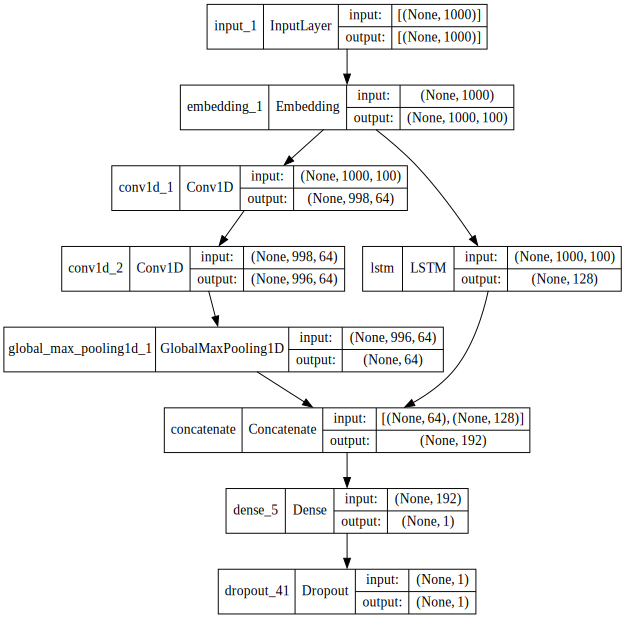

In [95]:
import keras
from keras.utils.vis_utils import model_to_dot
import pydot as pyd
keras.utils.vis_utils.pydot = pyd

from IPython.display import SVG

#Plot RCNN + LSTM Deep Learning Model Architecture
SVG(model_to_dot(RCNN_LSTM_model, show_shapes = True, show_layer_names = True, dpi = 70).create(prog = 'dot', format = 'svg'))


**10.2.5: Training the RCNN + LSTM Deep Learning Model**

In [96]:
#Training my designed RCNN + LSTM Model
RCNN_LSTM_hist = RCNN_LSTM_model.fit(RCTMPad_X_train, RCTM_y_train, validation_split = 0.2, epochs = 10, batch_size = 32)

Epoch 1/10
24/24 [==============================] - 80s 3s/step - loss: 2.0199 - accuracy: 0.5403 - val_loss: 0.6570 - val_accuracy: 0.5215
Epoch 2/10
24/24 [==============================] - 80s 3s/step - loss: 2.0071 - accuracy: 0.7446 - val_loss: 0.5207 - val_accuracy: 0.8011
Epoch 3/10
24/24 [==============================] - 78s 3s/step - loss: 1.8288 - accuracy: 0.7903 - val_loss: 0.3533 - val_accuracy: 0.8817
Epoch 4/10
24/24 [==============================] - 74s 3s/step - loss: 1.4016 - accuracy: 0.8952 - val_loss: 0.1264 - val_accuracy: 0.9839
Epoch 5/10
24/24 [==============================] - 78s 3s/step - loss: 1.4609 - accuracy: 0.9032 - val_loss: 0.0922 - val_accuracy: 0.9677
Epoch 6/10
24/24 [==============================] - 77s 3s/step - loss: 1.3514 - accuracy: 0.9126 - val_loss: 0.0880 - val_accuracy: 0.9839
Epoch 7/10
24/24 [==============================] - 74s 3s/step - loss: 1.4120 - accuracy: 0.9073 - val_loss: 0.0779 - val_accuracy: 0.9839
Epoch 8/10
24/24 [==

**10.2.6: RCNN + LSTM Deep Learning Model Prediction**

In [97]:
##Model Prediction on Unseen Padded Test Data
RCTM_LSTM_y_pred = (RCNN_LSTM_model.predict(RCTMPad_X_test) > 0.5).astype(int)


**10.2.7: EDC-NLP + RCNN + LSTM Deep Learning Model Evaluation**

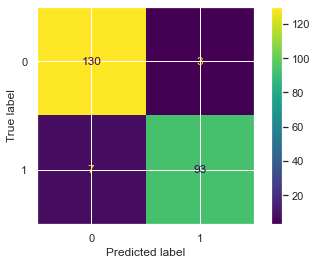

Accuracy Score:  95.71 %
Precision Score:  96.88 %
Recall Score:  93.0 %
F1 Score:  94.9 %


In [98]:
#Model Evaluation
final_y_pred = np.round(RCTM_LSTM_y_pred).flatten()

#Module to plot a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix
deepRCNNLSTM_con_matx = metrics.confusion_matrix(RCTM_y_test, final_y_pred)


#Confusion Matrix Plot
deepRCNNLSTM_cf_plot = ConfusionMatrixDisplay(confusion_matrix = deepRCNNLSTM_con_matx)
deepRCNNLSTM_cf_plot.plot()
plt.show()


#Accuracy Score
deepRCNNLSTM_accuracy = metrics.accuracy_score(RCTM_y_test, final_y_pred)
print('Accuracy Score: ', round(deepRCNNLSTM_accuracy*100,2), '%')


#Precision Score
deepRCNNLSTM_precision = metrics.precision_score(RCTM_y_test, final_y_pred)
print('Precision Score: ', round(deepRCNNLSTM_precision*100,2), '%')

#Recall Score
deepRCNNLSTM_recall = metrics.recall_score(RCTM_y_test, final_y_pred)
print('Recall Score: ', round(deepRCNNLSTM_recall*100,2), '%')

#F1 Score
deepRCNNLSTM_f1 = metrics.f1_score(RCTM_y_test, final_y_pred)
print('F1 Score: ', round(deepRCNNLSTM_f1*100,2), '%')



**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 11</center>**

**<center>BASELINE Pro MODEL</center>**

<center>EDC-NLP + TF-IDF Approach + Multinomial Naive Bayes Classifier</center>


In [99]:
pro_list_corpus = [d for d in final_usage_df['Processed_Headline']]

In [100]:
#Implement the TfidfVectorizer module
pro_tfidf_vectorize = TfidfVectorizer()

#Fit the X data of all the headlines into an array format
pro_X_idf = pro_tfidf_vectorize.fit_transform(pro_list_corpus).toarray()

#Assign the values of the 'FakeorReal' column in the headlines dataset to the y data
pro_y_idf = final_usage_df['FakeorReal']

**11.1.1: Train and Test data split - EDC-NLP Dataset Classification**

In [101]:
#Split up the data into training sets and testing sets to be used for text classification
proX_train_idf, proX_test_idf, proy_train_idf, proy_test_idf = train_test_split(pro_X_idf, pro_y_idf, test_size = 0.2, random_state = 0)


#Convert the X training data into a data frame that is represented as features
pro_tfidf_df = pd.DataFrame(proX_train_idf, columns = pro_tfidf_vectorize.get_feature_names())

#Print the first 5 results of the tf-idf vectorization
pro_tfidf_df.head(5)

#Implementing the multinomial NB classifier 
pro_NB_classify_tfidf = MultinomialNB()

#Fitting the X_train and y_train data into the classifier for training
pro_NB_classify_tfidf.fit(proX_train_idf, proy_train_idf)


MultinomialNB()

**11.1.2: y_pred Prediction using the X_test data in the TF-IDF model - EDC-NLP Dataset Classification**

In [102]:
#Predict the news labels for the test data using the multinomial NB classifier
pro_y_pred_idf = pro_NB_classify_tfidf.predict(proX_test_idf)

**11.1.3: CONFUSION MATRIX FOR BASELINE PRO MODEL**

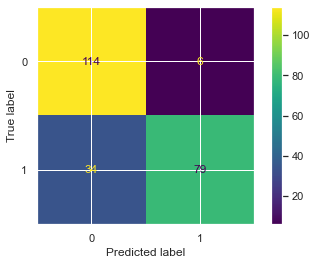

In [103]:
#Module to plot a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix for y_pred results
pro_con_matrix_tfidf  = metrics.confusion_matrix(proy_test_idf, pro_y_pred_idf)

#Confusion Matrix Plot
pro_result_plot = ConfusionMatrixDisplay(confusion_matrix = pro_con_matrix_tfidf, display_labels = pro_NB_classify_tfidf.classes_)
pro_result_plot.plot()
plt.show()

**11.1.4: ACCURACY SCORE FOR BASELINE PRO MODEL**

In [104]:
#Calculate and print the accuracy score using the sklearn library
pro_acc_score_idf = metrics.accuracy_score(proy_test_idf, pro_y_pred_idf)
print('Accuracy Score: ', round(pro_acc_score_idf*100,2), '%')

Accuracy Score:  82.83 %


**11.1.5: RECALL SCORE FOR BASELINE PRO MODEL**

In [105]:
#Calculate and print the recall score using the sklearn library
pro_recall_score_idf = metrics.recall_score(proy_test_idf, pro_y_pred_idf)
print('Recall Score: ', round(pro_recall_score_idf*100,2), '%')

Recall Score:  69.91 %


**11.1.6: PRECISION SCORE FOR BASELINE PRO MODEL**

In [106]:
#Calculate and print the precision score using the sklearn library
pro_precision_score_idf = metrics.precision_score(proy_test_idf, pro_y_pred_idf)
print('Precision Score: ', round(pro_precision_score_idf*100,2), '%')

Precision Score:  92.94 %


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 12</center>**

**<center>ALTERNATIVE Pro MODEL</center>**

<center>EDC-NLP + TF-IDF Approach + Passive Aggressive Classifier</center>

**12.1.1: ALTERNATIVE CLASSIFICATION MODEL FOR FAKE/REAL NEWS CLASSIFICATION - EDC-NLP Dataset Classification**

In [107]:
#Library for alternative classification procedure
from sklearn.linear_model import PassiveAggressiveClassifier

#Assigning previously split data to another variable for transition into new classification model
proX_train_paggro = proX_train_idf
proX_test_paggro = proX_test_idf
proy_train_paggro = proy_train_idf
proy_test_paggro = proy_test_idf

##Implementing the passive aggressive classifier 
proPaggroClassify = PassiveAggressiveClassifier(max_iter = 300)
#Fitting the X_train and y_train data into the passive aggressive classifier for training
proPaggroClassify.fit(proX_train_paggro, proy_train_paggro)

#Predict the news labels for the test data using the passive aggressive classifier
pro_y_pred_paggro = proPaggroClassify.predict(proX_test_paggro)


**12.1.2: CONFUSION MATRIX FOR ALTERNATIVE PRO CLASSIFICATION MODEL**

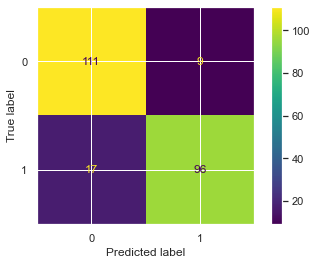

In [108]:
#Confusion Matrix for y_pred results
pro_con_matrix_paggro  = metrics.confusion_matrix(proy_test_paggro, pro_y_pred_paggro)

#Confusion Matrix Plot
pro_result_plot_paggro = ConfusionMatrixDisplay(confusion_matrix = pro_con_matrix_paggro, display_labels = proPaggroClassify.classes_)
pro_result_plot_paggro.plot()
plt.show()

**12.1.3: ACCURACY SCORE FOR ALTERNATIVE PRO CLASSIFICATION MODEL**

In [109]:
#Calculate and print the accuracy score using the sklearn library
pro_acc_score_paggro = metrics.accuracy_score(proy_test_paggro, pro_y_pred_paggro)
print('Accuracy Score: ', round(pro_acc_score_paggro*100,2), '%')

Accuracy Score:  88.84 %


**12.1.4: RECALL SCORE FOR ALTERNATIVE PRO CLASSIFICATION MODEL**

In [110]:
#Calculate and print the recall score using the sklearn library
pro_recall_score_paggro = metrics.recall_score(proy_test_paggro, pro_y_pred_paggro)
print('Recall Score: ', round(pro_recall_score_paggro*100,2), '%')

Recall Score:  84.96 %


**12.1.5: PRECISION SCORE FOR ALTERNATIVE PRO CLASSIFICATION MODEL**

In [111]:
#Calculate and print the precision score using the sklearn library
pro_precision_score_paggro = metrics.precision_score(proy_test_paggro, pro_y_pred_paggro)
print('Precision Score: ', round(pro_precision_score_paggro*100,2), '%')

Precision Score:  91.43 %


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<center>CHAPTER 13</center>**

**<center>COMPARISON OF RESULTS USING A GRAPH PLOT</center>**

<center>Final Evaluation:</center>

<center>Graph plot comparing accuracy, precision and recall scores of the 7 different Fake News Detection Text Classification approaches</center>

<center>Deep Learning accuracy/loss curve plots for training and validation data</center> 

**13.1: Evaluation Metrics Graph Plots**

In [112]:
project_eval_metrics = np.array([[acc_score_idf, precision_score_idf, recall_score_idf],
                               [pro_acc_score_idf, pro_precision_score_idf, pro_recall_score_idf],
                               [acc_score_paggro, precision_score_paggro, recall_score_paggro],
                               [pro_acc_score_paggro, pro_precision_score_paggro, pro_recall_score_paggro],
                               [bert_accuracy_score, 0, 0],
                               [deepCNN_accuracy, deepCNN_precision, deepCNN_recall],
                               [deepRCNNLSTM_accuracy, deepRCNNLSTM_precision, deepRCNNLSTM_recall]])



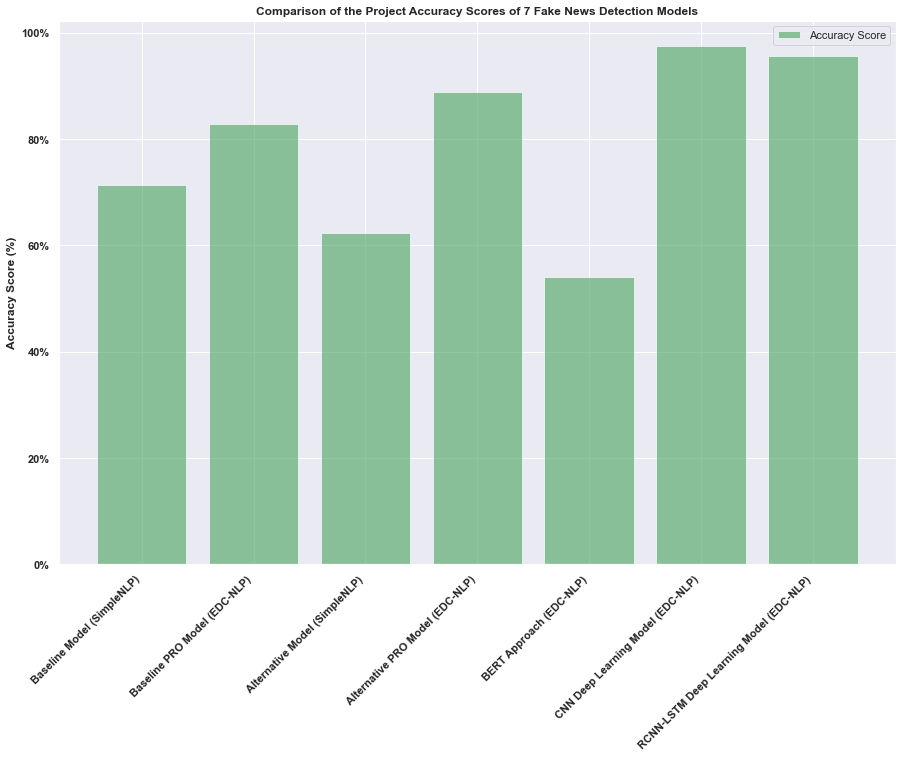

In [113]:
from matplotlib.ticker import PercentFormatter

#Plot a bar chart to compare the evaluation metrics and hence the performance of the 7 different
#text classification models for Fake News Detection
plt.figure(figsize = (15, 10))

plt.bar(range(7), project_eval_metrics[:, 0], color = 'g', alpha = 0.65, label = 'Accuracy Score')

plt.xticks(range(7), ['Baseline Model (SimpleNLP)', 'Baseline PRO Model (EDC-NLP)', 'Alternative Model (SimpleNLP)', 
                      'Alternative PRO Model (EDC-NLP)', 'BERT Approach (EDC-NLP)', 
                      'CNN Deep Learning Model (EDC-NLP)', 'RCNN-LSTM Deep Learning Model (EDC-NLP)'],
                      rotation = 45, ha = 'right', fontweight = 'bold')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.yticks(fontweight = 'bold')
plt.ylabel('Accuracy Score (%)', fontweight = 'bold')

plt.title('Comparison of the Project Accuracy Scores of 7 Fake News Detection Models', fontweight = 'bold')
plt.legend()

plt.show()

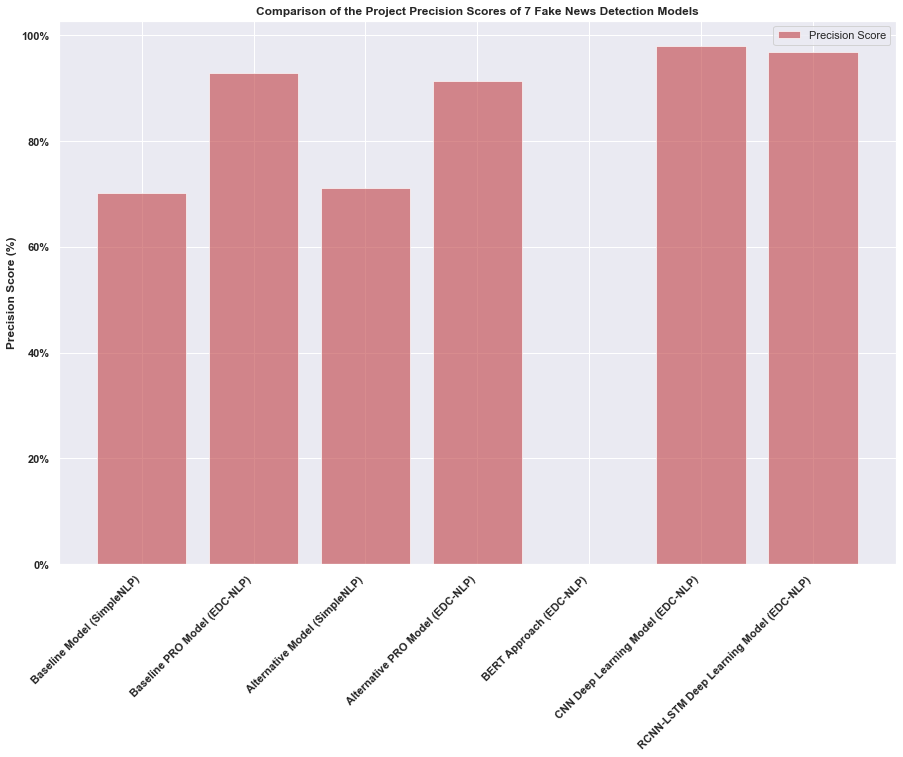

In [114]:
from matplotlib.ticker import PercentFormatter

#Plot a bar chart to compare the evaluation metrics and hence the performance of the 7 different
#text classification models for Fake News Detection
plt.figure(figsize = (15, 10))

plt.bar(range(7), project_eval_metrics[:, 1], color = 'r', alpha = 0.65, label = 'Precision Score')

plt.xticks(range(7), ['Baseline Model (SimpleNLP)', 'Baseline PRO Model (EDC-NLP)', 'Alternative Model (SimpleNLP)', 
                      'Alternative PRO Model (EDC-NLP)', 'BERT Approach (EDC-NLP)', 
                      'CNN Deep Learning Model (EDC-NLP)', 'RCNN-LSTM Deep Learning Model (EDC-NLP)'],
                      rotation = 45, ha = 'right', fontweight = 'bold')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.yticks(fontweight = 'bold')
plt.ylabel('Precision Score (%)', fontweight = 'bold')

plt.title('Comparison of the Project Precision Scores of 7 Fake News Detection Models', fontweight = 'bold')
plt.legend()

plt.show()

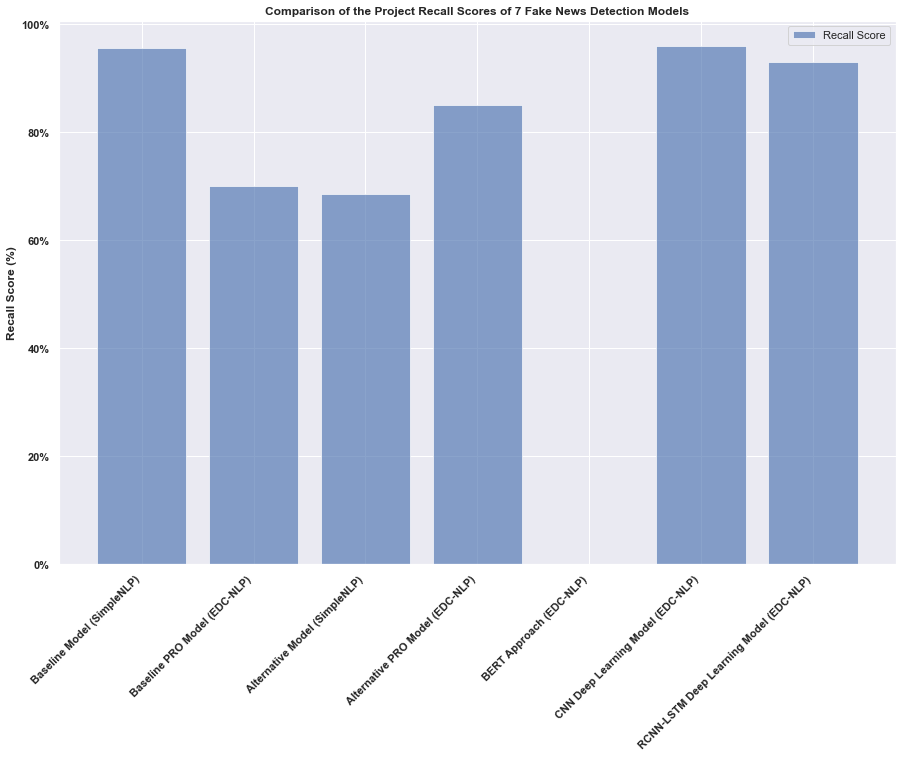

In [115]:
from matplotlib.ticker import PercentFormatter

#Plot a bar chart to compare the evaluation metrics and hence the performance of the 7 different
#text classification models for Fake News Detection
plt.figure(figsize = (15, 10))

plt.bar(range(7), project_eval_metrics[:, 2], color = 'b', alpha = 0.65, label = 'Recall Score')

plt.xticks(range(7), ['Baseline Model (SimpleNLP)', 'Baseline PRO Model (EDC-NLP)', 'Alternative Model (SimpleNLP)', 
                      'Alternative PRO Model (EDC-NLP)', 'BERT Approach (EDC-NLP)', 
                      'CNN Deep Learning Model (EDC-NLP)', 'RCNN-LSTM Deep Learning Model (EDC-NLP)'],
                      rotation = 45, ha = 'right', fontweight = 'bold')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.yticks(fontweight = 'bold')
plt.ylabel('Recall Score (%)', fontweight = 'bold')

plt.title('Comparison of the Project Recall Scores of 7 Fake News Detection Models', fontweight = 'bold')
plt.legend()

plt.show()

**13.2: Deep Learning Models Training/Validation Accuracy/Loss Curves**

**13.2.1: EDC-NLP + CNN Deep Learning Model**

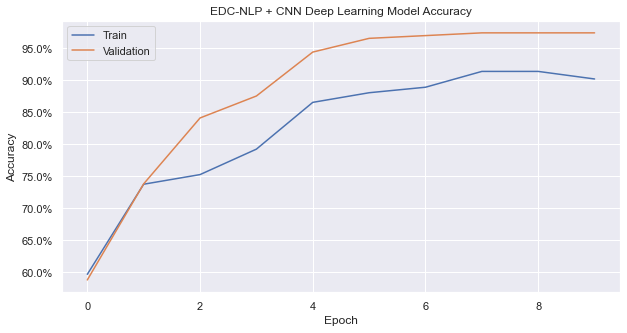

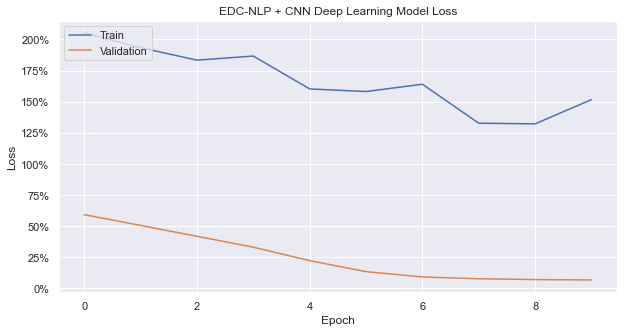

In [116]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#Deep CNN Model Accuracy History
plt.figure(figsize = (10,5))

plt.title('EDC-NLP + CNN Deep Learning Model Accuracy')

plt.plot(deepCNN_hist.history['accuracy'])
plt.plot(deepCNN_hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



#Deep CNN Model Loss History
plt.figure(figsize = (10,5))

plt.title('EDC-NLP + CNN Deep Learning Model Loss')

plt.plot(deepCNN_hist.history['loss'])
plt.plot(deepCNN_hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

**13.2.2: EDC-NLP + RCNN + LSTM Deep Learning Model**

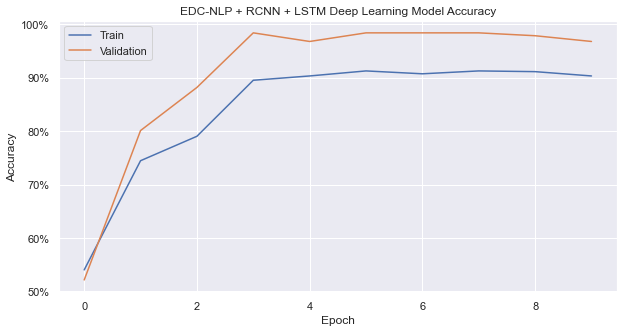

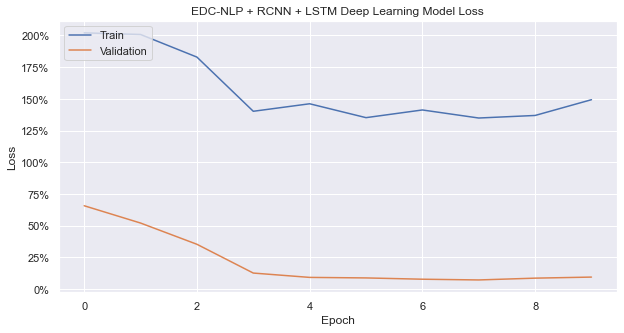

In [117]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#RCNN + LSTM Deep Learning Model Accuracy History
plt.figure(figsize = (10,5))

plt.title('EDC-NLP + RCNN + LSTM Deep Learning Model Accuracy')

plt.plot(RCNN_LSTM_hist.history['accuracy'])
plt.plot(RCNN_LSTM_hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



#RCNN + LSTM Deep Learning Model Loss History
plt.figure(figsize = (10,5))

plt.title('EDC-NLP + RCNN + LSTM Deep Learning Model Loss')

plt.plot(RCNN_LSTM_hist.history['loss'])
plt.plot(RCNN_LSTM_hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

**<center>END OF NOTEBOOK</center>**